# Продвинутое машинное обучение: ДЗ 1

In [1]:
from functools import partial

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn import linear_model
from scipy.stats import multivariate_normal

sns.set_style("whitegrid")

## Часть I: О теореме Байеса 

### Задача 1

#### Условие

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!  
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”.  
В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

#### Решение

Пусть:  
$P(R)$ - вероятность наличия у человека крови редкой группы  
$P(G)$ - вероятность виновности подсудимого  

Тогда вероятность, которую в итоге нужно оценить:  
$P(G|R)$ - вероятность виновности подсудимого при наличии у него редкой группы крови

Прокурор утверждает следующее:  
$P(R|\overline G) = 0.01 => P(G|R) = 1 - P(R|\overline G) = 0.99$  

Что неверно, так как $1 - P(R|\overline G) = P(\overline R|\overline G)$  
$P(\overline R|\overline G)$  - вероятность отсутствия редкой группы крови у подсудимого в случае его невиновности.

### Задача 2

#### Условие

Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”.  
В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить.

#### Решение

По теореме Байеса искомая вероятность выражается как:

$$
P(G|R) = \frac{P(R|G)P(G)}{P(R)}
$$

Адвокат же определяет ее на основании предположения о равновероятной виновности любого человека, что не является верным. Вероятность $P(G)$ может зависеть от разных факторов (как минимум, она зависит от возраста). В итоге адвокат просто оценивает вероятность выбрать случайным образом одного человека из 10000. 

### Задача 3

#### Условие

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.  
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).  
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

#### Решение

Пусть:  
$P(P)$ - вероятность положительного теста    
$P(N)$ - вероятность отрицательного теста  

$P(I)$ - вероятность наличия болезни (ill)       
$P(H)$ - вероятность отсутствия болезни (healthy)

$P(P|H)$ - вероятность положительного теста у здорового человека (false positive)  
$P(N|I)$ - вероятность отрицательного теста у больного человека (false negative)

Тогда по условию:  
$P(I) = 0.01$  
$P(P|H) = 0.05$  
$P(N|I) = 0.05$  

Апостериорная вероятность наличия болезни после положительного теста:

$$
P(I|P) = \frac{P(P|I)P(I)}{P(P|I)P(I) + P(P|H)P(H)}
$$

Апостериорная вероятность наличия болезни после отрицательного теста:

$$
P(I|N) = \frac{P(N|I)P(I)}{P(N|I)P(I) + P(N|H)P(H)}
$$

In [2]:
P_ERROR = 0.05


def get_posterior(p_error=P_ERROR, p_I=0.01, is_positive=True):
    p_H = 1 - p_I
    p_PH = p_error
    p_NH = 1 - p_PH 
    p_NI = p_error
    p_PI = 1 - p_NI
    if is_positive:
        return p_PI * p_I / (p_PI * p_I + p_PH * p_H)
    else:
        return p_NI * p_I / (p_NI * p_I + p_NH * p_H)

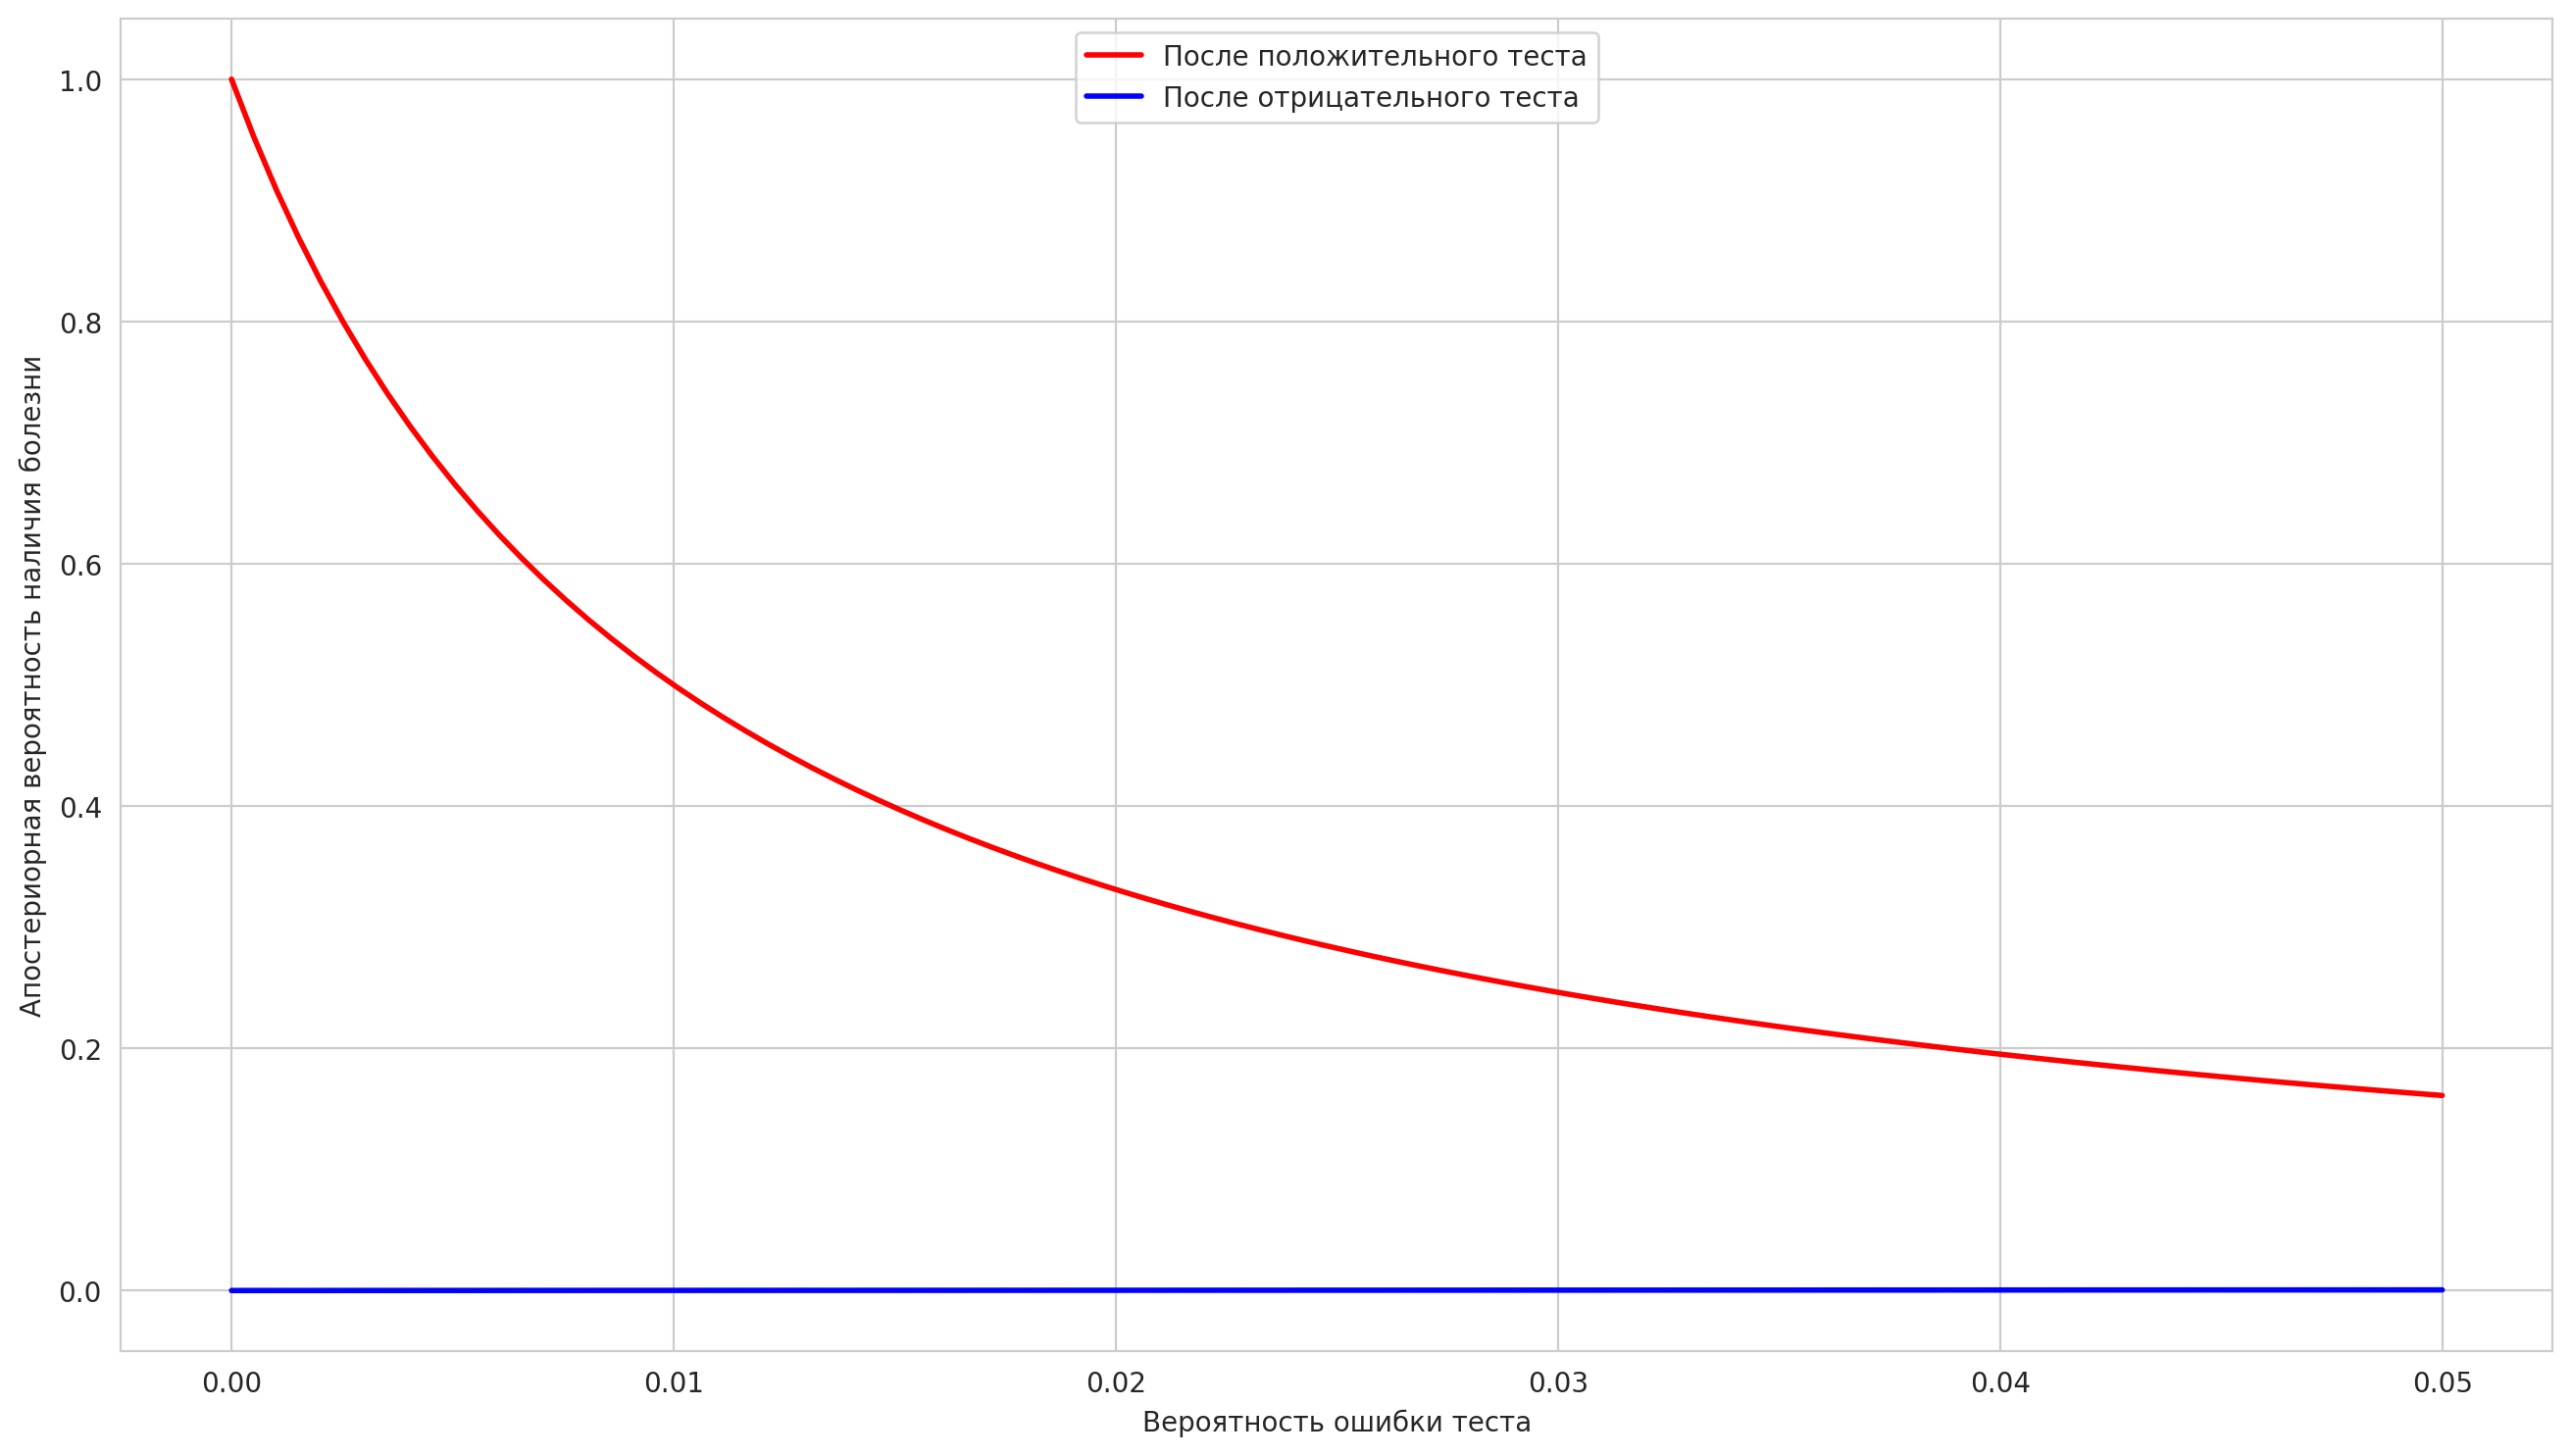

In [3]:
fig = plt.figure(figsize=(16, 9), dpi=200)
ax = fig.add_subplot(111)

x = np.linspace(0, P_ERROR, 100)
ax.plot(x, get_posterior(x, is_positive=True), 
        linewidth=2, label='После положительного теста', color="r")
ax.plot(x, get_posterior(x, is_positive=False), 
        linewidth=2, label='После отрицательного теста', color="b")

ax.legend(loc="upper center")
ax.set_xlabel("Вероятность ошибки теста")
ax.set_ylabel("Апостериорная вероятность наличия болезни")

plt.show()

Из графика видно, что уменьшение вероятности отрицательного теста у больного человека $P(N|I)$ практически не влияет на апостериорную вероятность наличия болезни после отрицательного теста $P(I|N)$. Уменьшение же вероятности положительного теста у здорового человека $P(P|H)$ более ощутимо увеличивает апостериорную вероятность наличия болезни после положительного теста $P(I|P)$.

In [4]:
for i in np.logspace(-1, -4, 10):
    print(f"P(I|P) = {get_posterior(p_error=i):.3f}, при ошибке теста в {i * 100:.2f}%")

P(I|P) = 0.083, при ошибке теста в 10.00%
P(I|P) = 0.172, при ошибке теста в 4.64%
P(I|P) = 0.314, при ошибке теста в 2.15%
P(I|P) = 0.500, при ошибке теста в 1.00%
P(I|P) = 0.684, при ошибке теста в 0.46%
P(I|P) = 0.824, при ошибке теста в 0.22%
P(I|P) = 0.910, при ошибке теста в 0.10%
P(I|P) = 0.956, при ошибке теста в 0.05%
P(I|P) = 0.979, при ошибке теста в 0.02%
P(I|P) = 0.990, при ошибке теста в 0.01%


## Часть II: О линейной регрессии

### 1. Подготовка данных

In [5]:
DATASET_PATH = "owid-covid-data.csv"
DATES = ["2020-05-01", "2020-06-01", "2020-09-01"]
FIRST_DAY = "2020-03-03"
POPULATION = 145934462

In [6]:
def get_dataset(first_day, n_days=50, country="Russia"):
    df = pd.read_csv(DATASET_PATH)
    df.loc[df.new_cases <= 0, "new_cases"] = 1
    df_rus = df[(df.location == country) & (df.date >= first_day)][["new_cases", "total_cases", "date"]]
    df_rus.reset_index(inplace=True, drop=True)
    df_rus["day"] = df_rus.index + 1
    return df_rus[df_rus.day <= n_days]


def get_weights(linear_model):
    linear_model.coef_[:, 0] = linear_model.intercept_
    return linear_model.coef_.T


def get_day_number(first_day, last_day):
    return (pd.to_datetime(last_day) - pd.to_datetime(first_day)).days + 1

Априорное распределение параметров модели

$$
p(\textbf{w}) = 
\mathcal{N}(\textbf{w}|\boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0)
$$

Апостериорное распределение параметров модели

$$
p(\textbf{w}|\textbf{D}) = 
\mathcal{N}(\textbf{w}|\boldsymbol{\mu}_N, \boldsymbol{\Sigma}_N)
$$

где

$$
\boldsymbol{\mu}_N = \boldsymbol{\Sigma}_N(\boldsymbol{\Sigma}_0^{-1}\boldsymbol{\mu}_0 + 
\frac{1}{\sigma^{2}} \boldsymbol\Phi^T \textbf{y})
$$

$$
\boldsymbol{\Sigma}_N^{-1} =
\boldsymbol{\Sigma}_0^{-1} + 
\frac{1}{\sigma^{2}} \boldsymbol\Phi^T\boldsymbol\Phi
$$

$\sigma^{2}$ - дисперсия шума в данных  
$\boldsymbol\Phi$ - матрица преобразованных признаков  
$\boldsymbol{\mu}_0$ - выбираем нулевым  
$\boldsymbol{\Sigma}_0$ - считаем равным $\alpha\textbf{I}$, где $\alpha$ достаточно большое число

In [7]:
def basis_functions(x, degree):
    return np.hstack([(x ** d).reshape(-1, 1) for d in range(degree + 1)])


def get_posterior_parameters(m, S, var_noise, F, X, y):
    S_post = np.linalg.inv(np.linalg.inv(S) + F(X).T @ F(X) / var_noise)
    m_post = S_post @ (np.linalg.inv(S) @ m + F(X).T @ np.log(y) / var_noise)
    return m_post, S_post


def get_predictive_empiric(m_post, S_post, F, X, n_samples=25):
    W = np.random.multivariate_normal(m_post.flatten(), S_post, n_samples)
    return W @ F(X).T

#### Графики целевых переменных

In [8]:
df_rus = get_dataset(FIRST_DAY, n_days=50)
df_rus.tail(3)

,new_cases,total_cases,date,day
47,6060.0,42853.0,2020-04-19,48
48,4268.0,47121.0,2020-04-20,49
49,5642.0,52763.0,2020-04-21,50


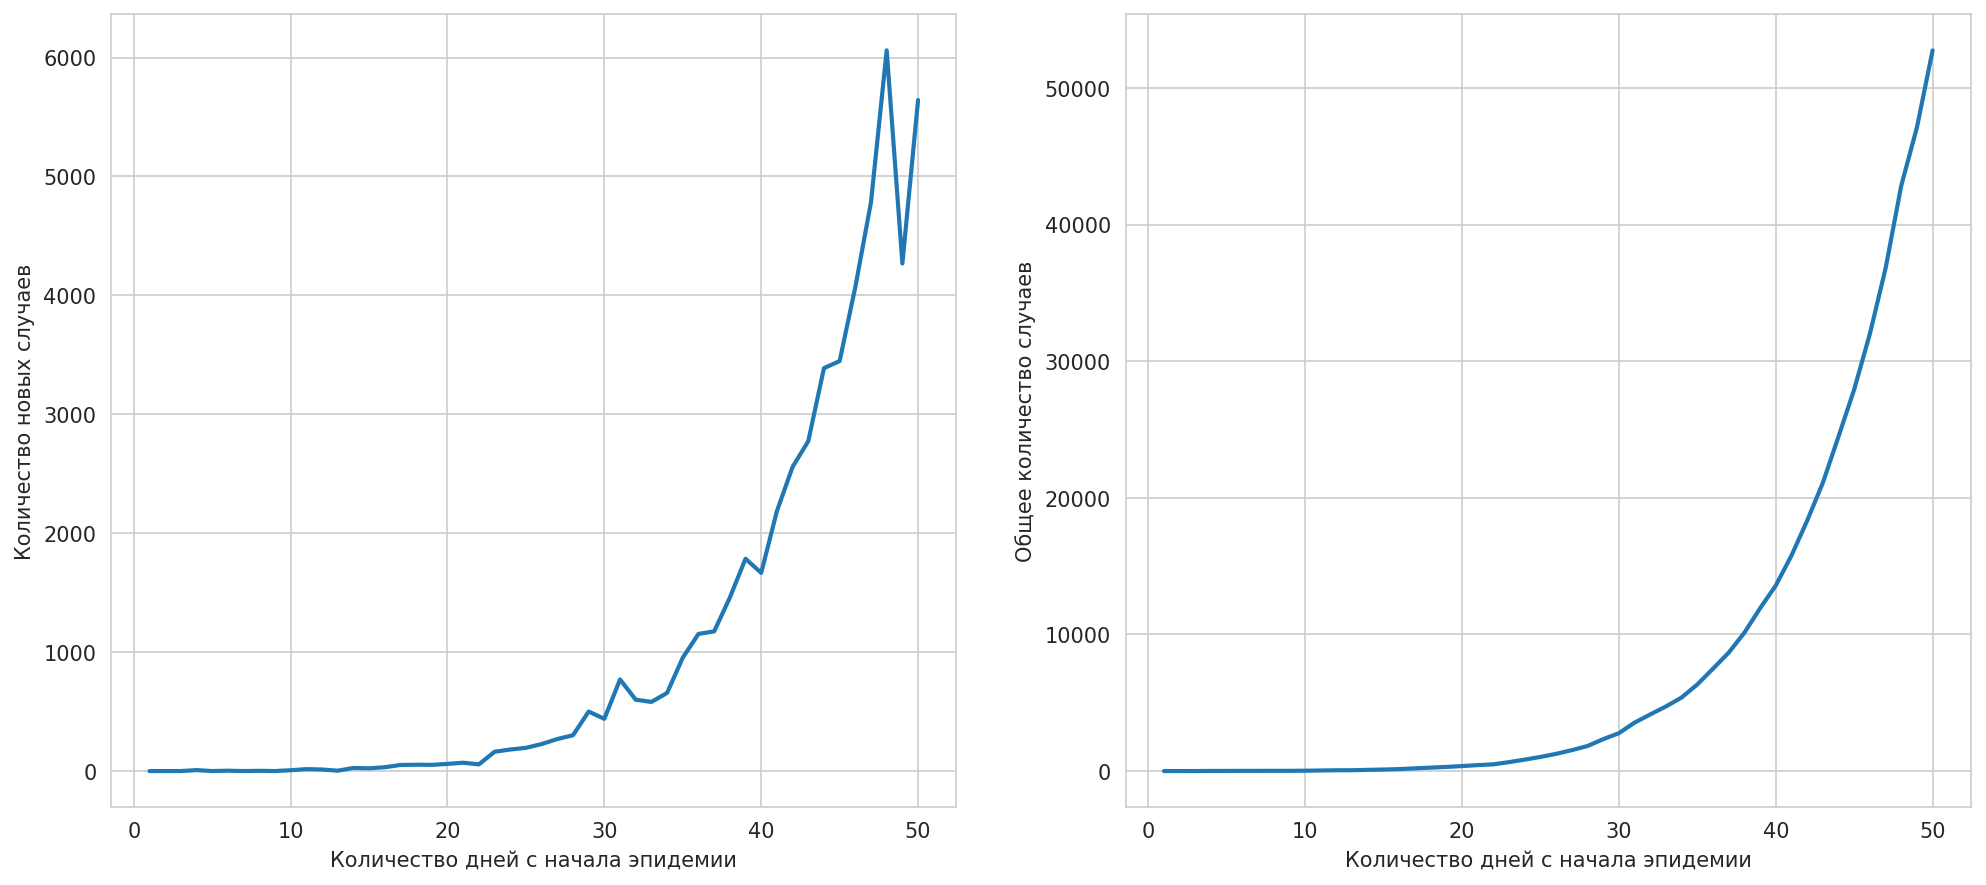

In [9]:
fig = plt.figure(figsize=(16, 7), dpi=150)

ax = fig.add_subplot(121)
ax.plot(df_rus.day, df_rus.new_cases, linewidth=2)
ax.set_xlabel("Количество дней с начала эпидемии")
ax.set_ylabel("Количество новых случаев")

ax = fig.add_subplot(122)
ax.plot(df_rus.day, df_rus.total_cases, linewidth=2)
ax.set_xlabel("Количество дней с начала эпидемии")
ax.set_ylabel("Общее количество случаев")

plt.show()

### 2. Экспоненциальная модель

Чтобы обучить экспоненциальную модель при помощи линейной, прологарифмируем общее количество случаев

In [10]:
F = partial(basis_functions, degree=1)
X = df_rus.day.to_numpy().reshape(-1, 1)
y = df_rus["total_cases"].to_numpy().reshape(-1, 1)

In [11]:
model_exp = linear_model.LinearRegression()
model_exp.fit(F(X), np.log(y))
w = get_weights(model_exp)

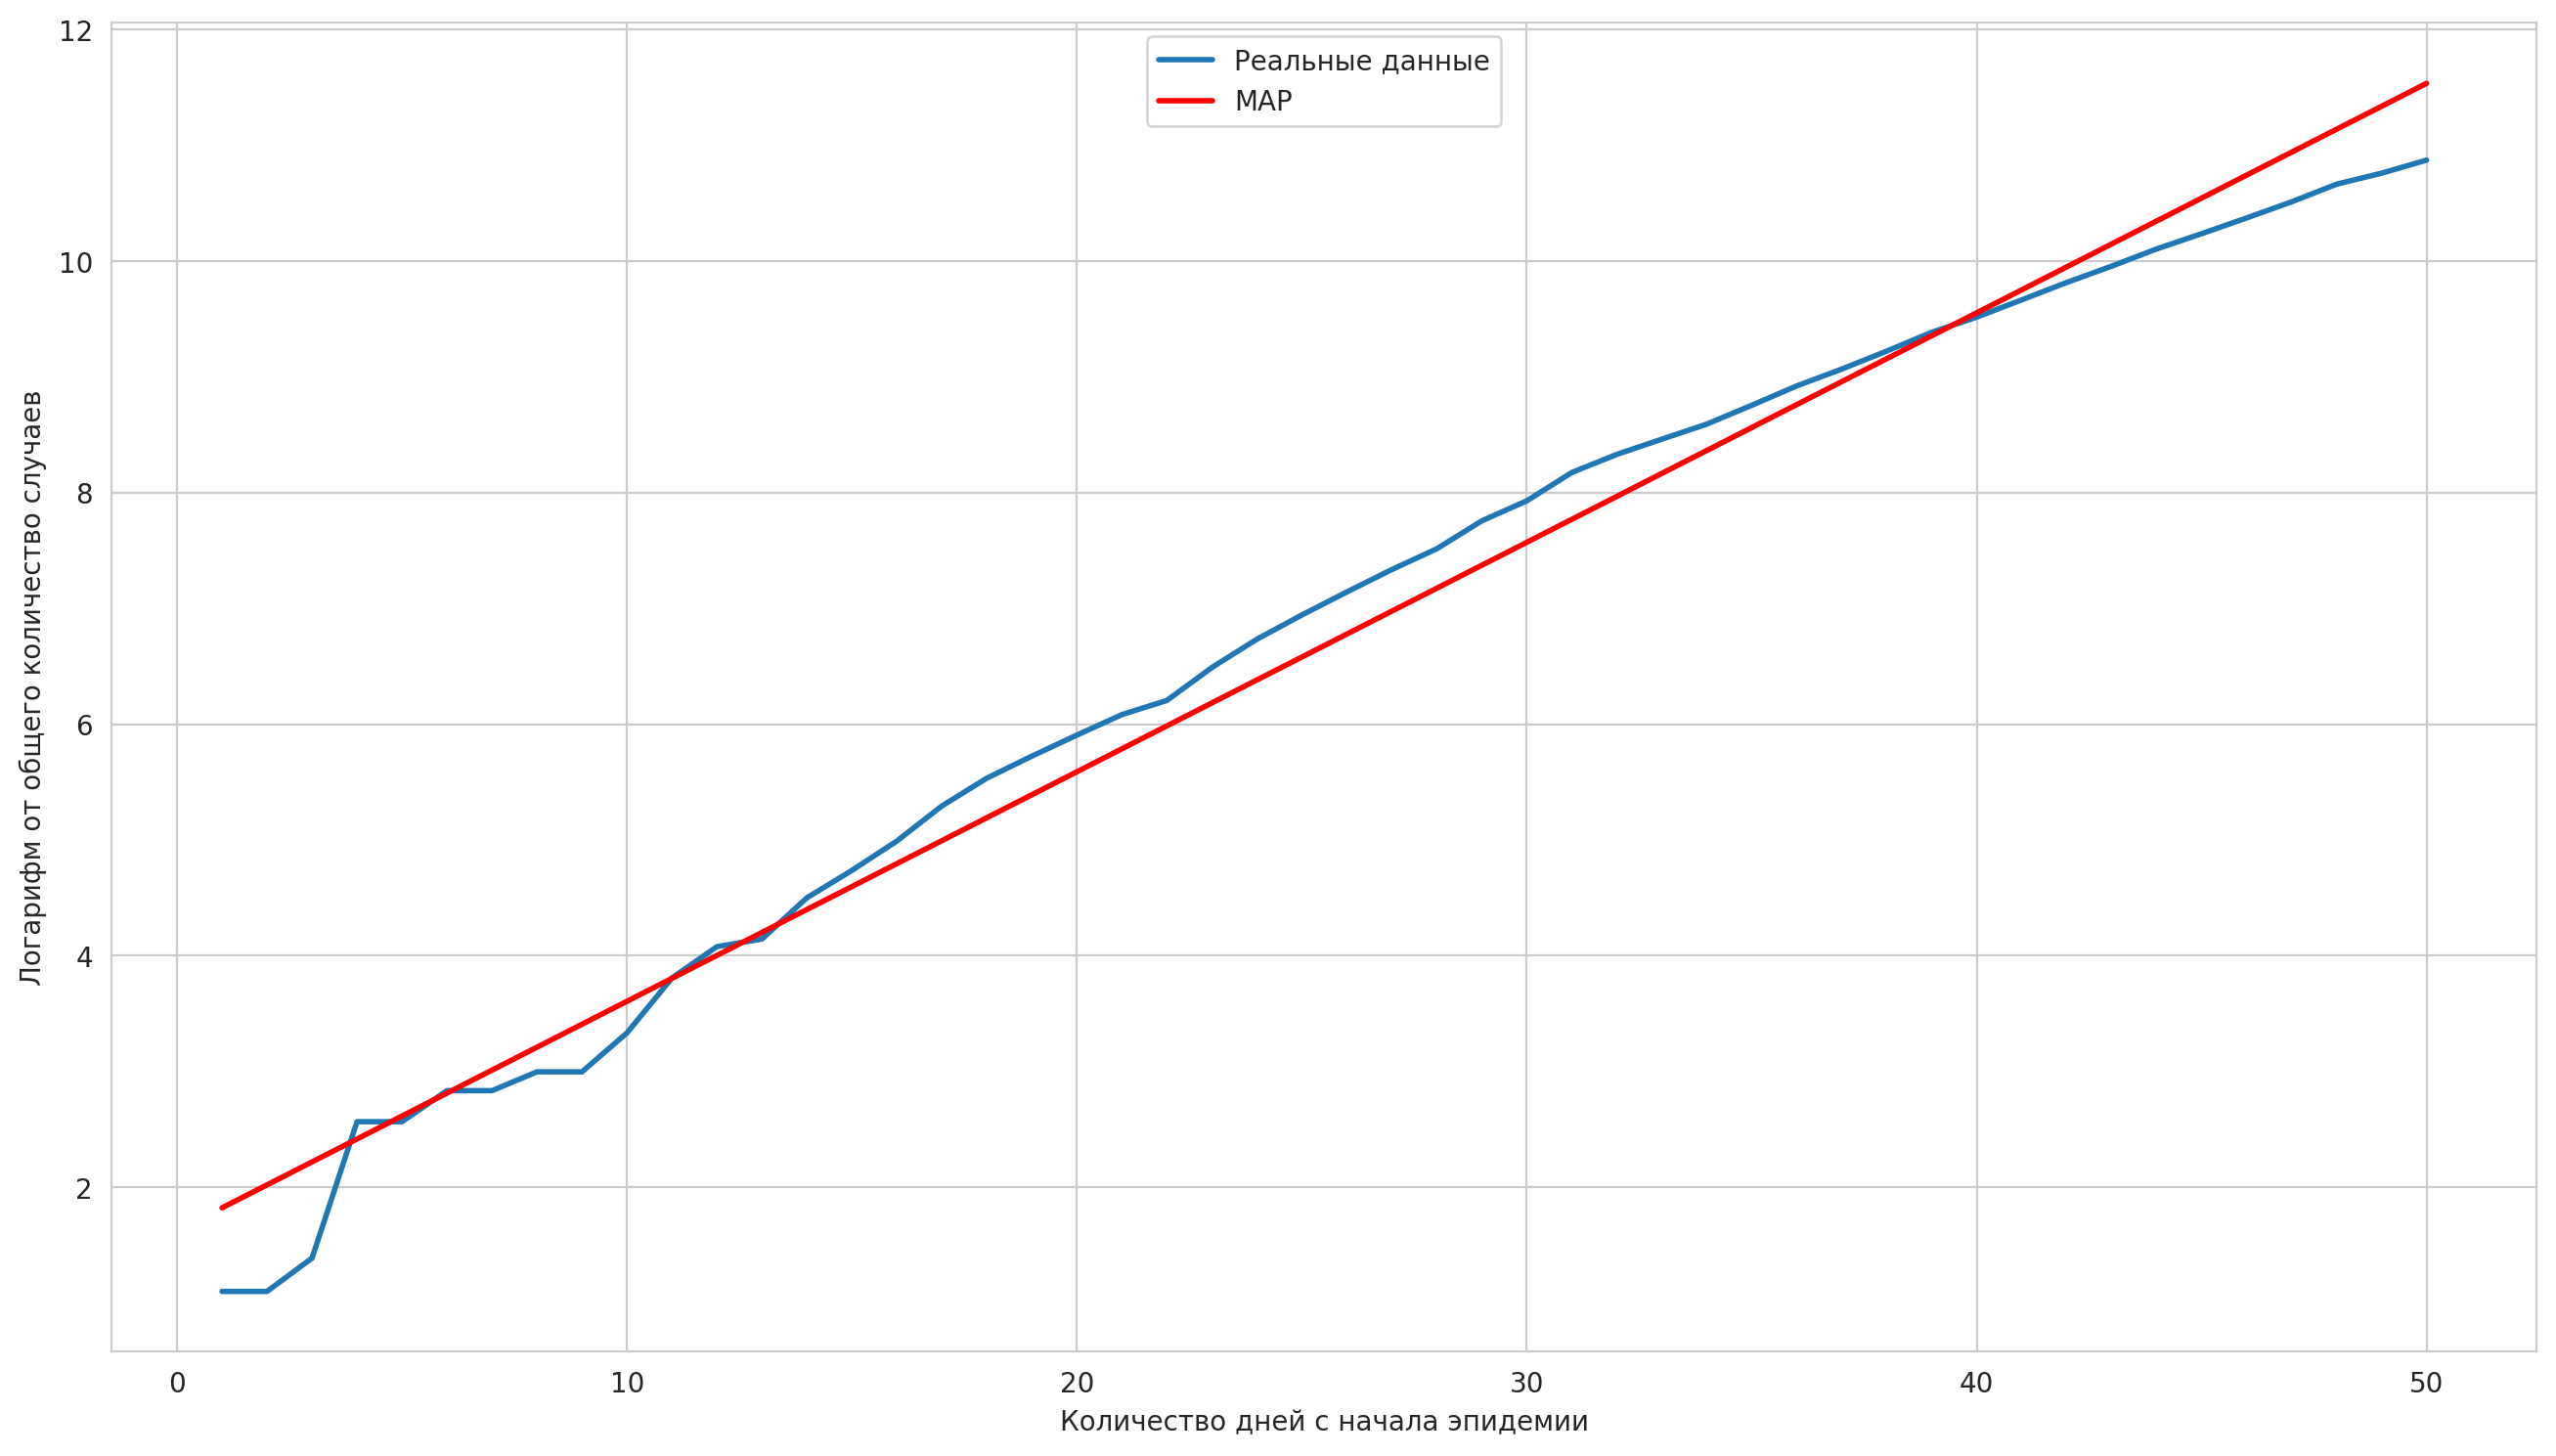

In [12]:
fig = plt.figure(figsize=(16, 9), dpi=200)

ax = fig.add_subplot(111)
ax.plot(X, np.log(y), linewidth=2, label="Реальные данные")
ax.plot(X, F(X) @ w, linewidth=2, color="r", label="MAP")

ax.set_xlabel("Количество дней с начала эпидемии")
ax.set_ylabel("Логарифм от общего количество случаев")
ax.legend(loc="upper center")

plt.show()

#### Параметры апостериорного распределения

In [13]:
var_noise = np.var(np.log(y) - F(X) @ w)
print("Дисперсия шума:", var_noise)

alpha = 10 ** 6
m_init = np.zeros((w.shape[0], 1))
S_init = np.eye(w.shape[0]) * alpha

m_post, S_post = get_posterior_parameters(m_init, S_init, var_noise, F, X, y)
print("MAP:\t\t", w.T)
print("Posterior:\t", m_post.T)

Дисперсия шума: 0.12183046154391232
MAP:		 [[1.62244624 0.19829091]]
Posterior:	 [[1.62244622 0.19829091]]


#### Семплирование из апостериорного распределения

In [14]:
n_samples = 50

Y_pred = get_predictive_empiric(m_post, S_post, F, X, n_samples=n_samples)

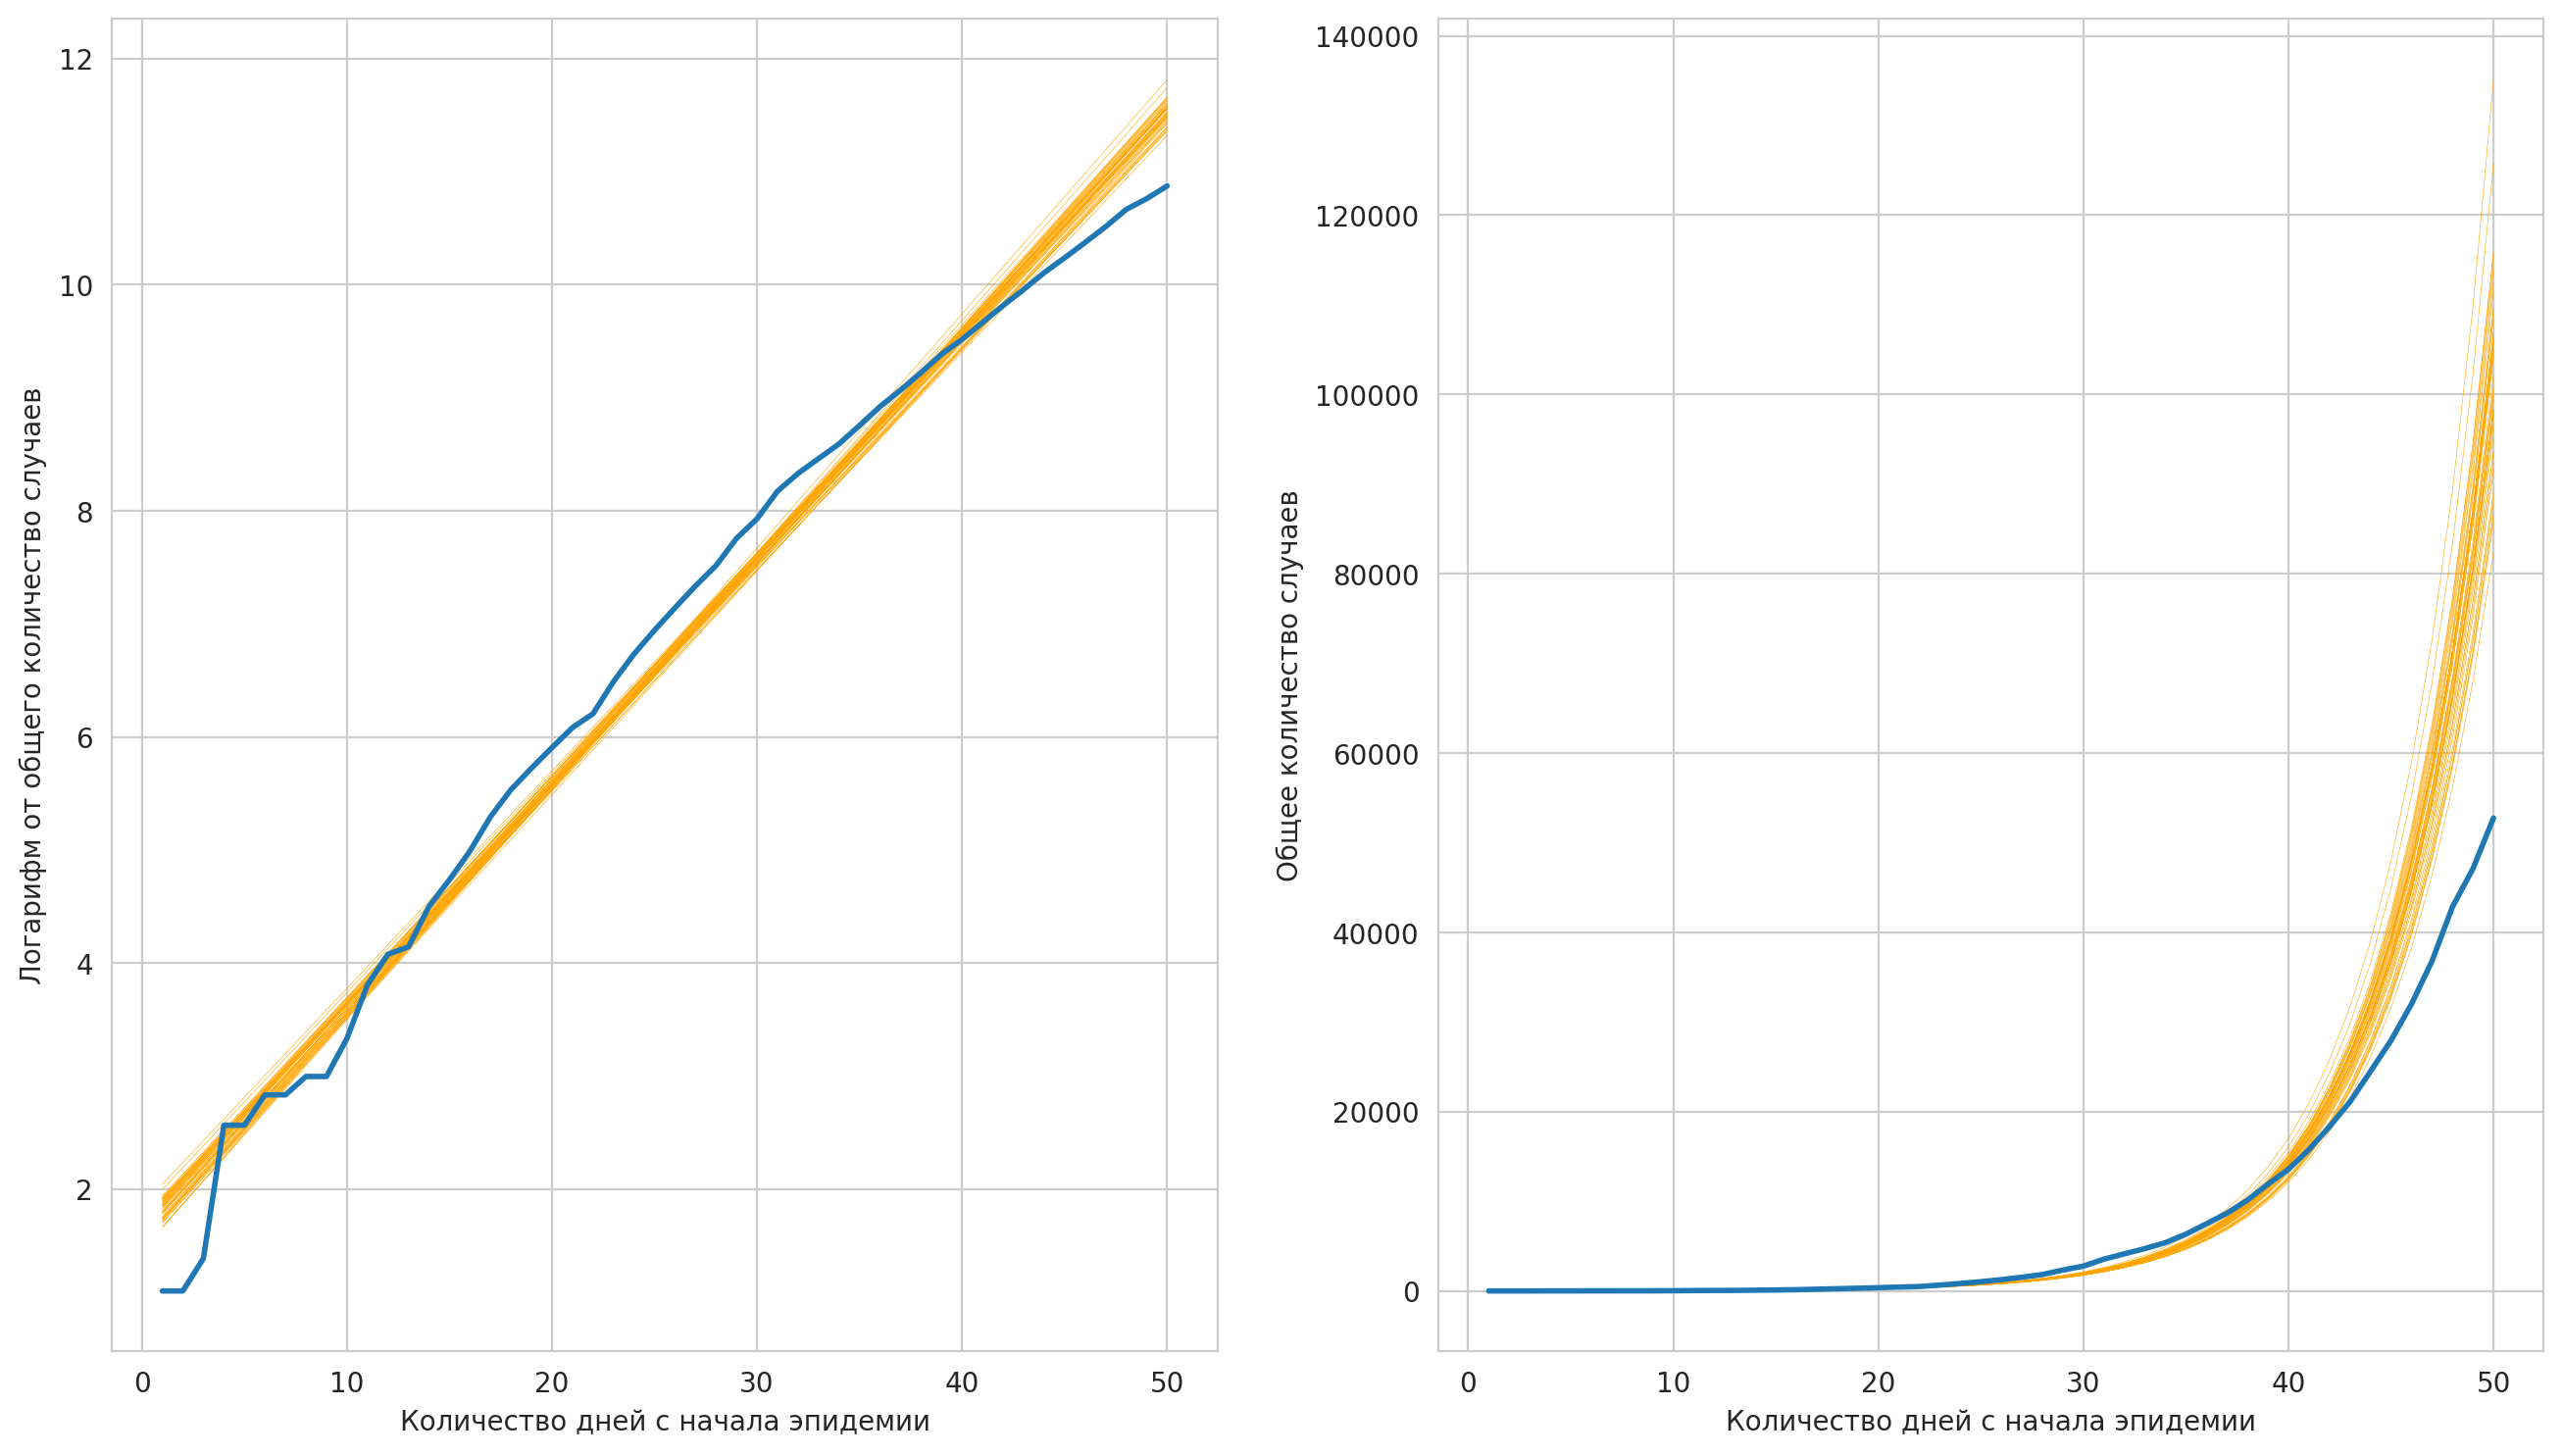

In [15]:
fig = plt.figure(figsize=(16, 9), dpi=200)

ax = fig.add_subplot(121)
for y_pred in Y_pred:
    ax.plot(X, y_pred, linewidth=0.2, color="orange")
ax.plot(X, np.log(y), linewidth=2)
ax.set_xlabel("Количество дней с начала эпидемии")
ax.set_ylabel("Логарифм от общего количество случаев")

ax = fig.add_subplot(122)
for y_pred in np.exp(Y_pred):
    ax.plot(X, y_pred, linewidth=0.2, color="orange")
ax.plot(X, y, linewidth=2)
ax.set_xlabel("Количество дней с начала эпидемии")
ax.set_ylabel("Общее количество случаев")
    
plt.show()

#### Предсказание числа заболевших

In [16]:
n_samples = 10 ** 6

days = [get_day_number(FIRST_DAY, date) for date in DATES]
Y_pred = np.exp(get_predictive_empiric(m_post, S_post, F, np.array(days).reshape(-1, 1), n_samples))
for date, m, s in zip(DATES, np.median(Y_pred, axis=0), Y_pred.std(axis=0)):
    print(f"{date}: {m / 10 ** 6:.2f} млн (стандартное отклонение: {s / 10 ** 6:.2f} млн)")

2020-05-01: 0.74 млн (стандартное отклонение: 0.10 млн)
2020-06-01: 347.76 млн (стандартное отклонение: 83.02 млн)
2020-09-01: 29105715400.86 млн (стандартное отклонение: 19645660669.31 млн)


#### Построение предсказательных распределений

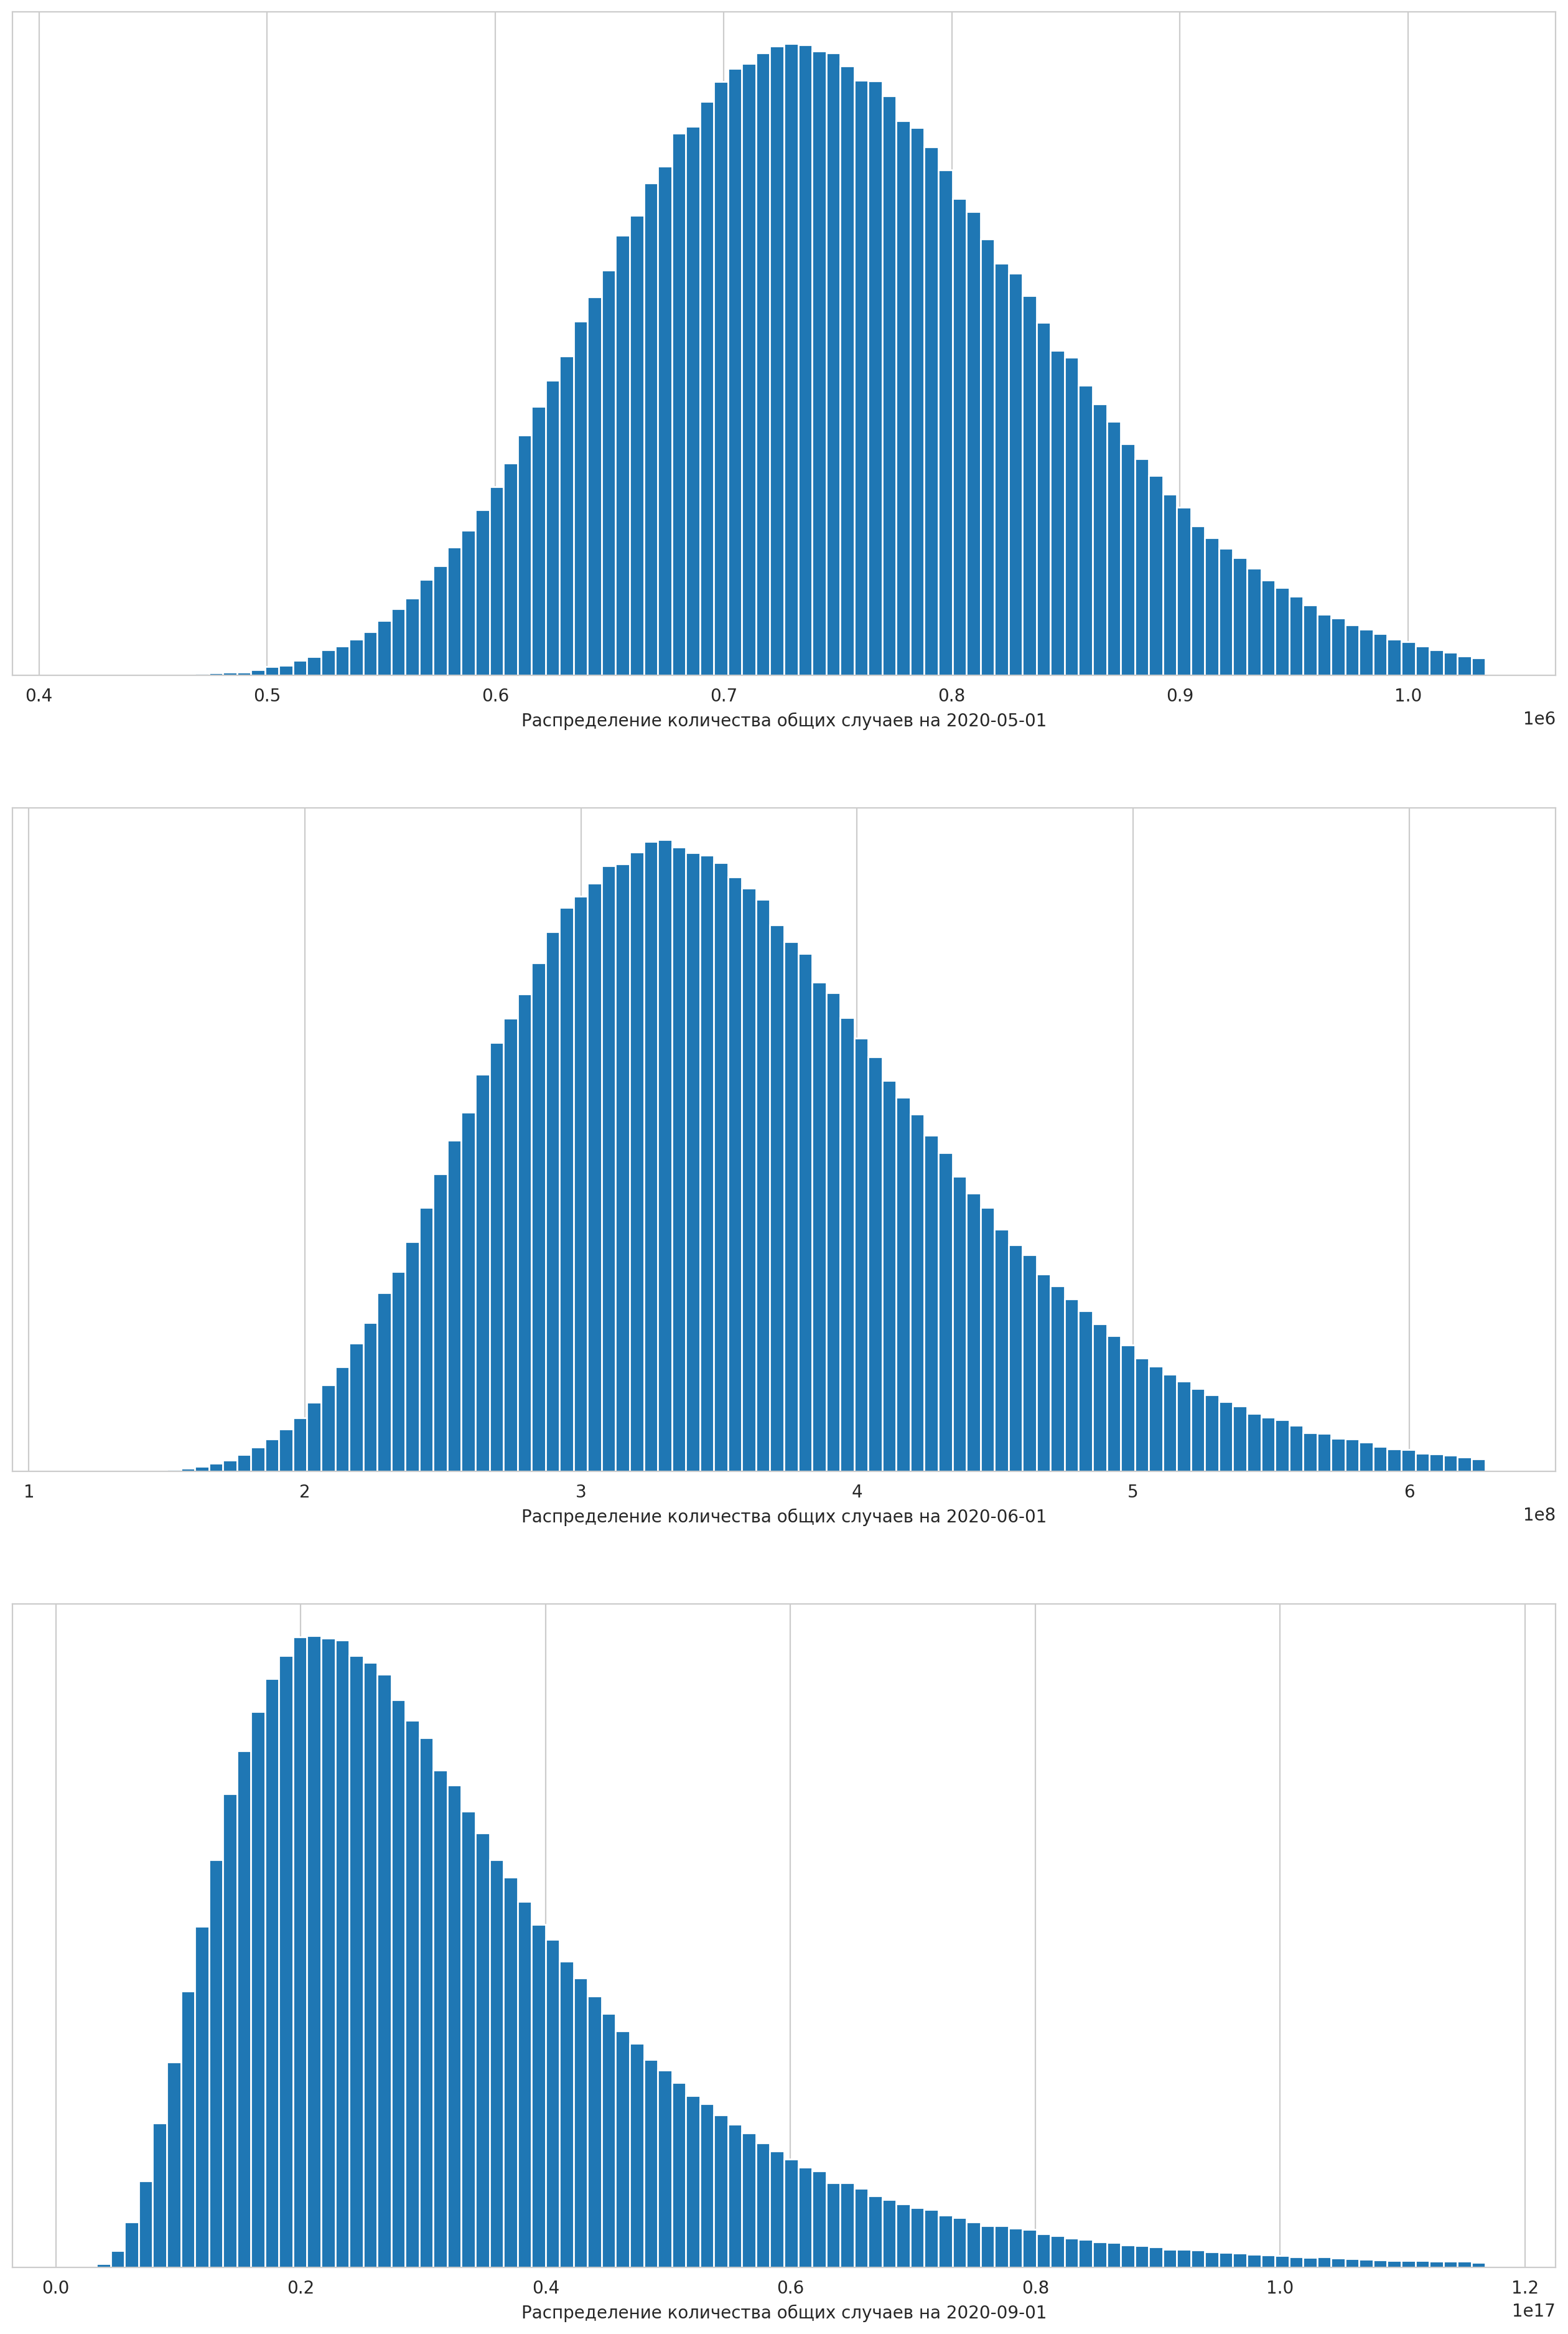

In [17]:
outliers_threshold = 99.5

fig = plt.figure(figsize=(16, 24), dpi=200)

for i, date in enumerate(DATES):
    ax = fig.add_subplot(3, 1, i + 1)
    y_pred = Y_pred[:, i]
    y_pred = y_pred[y_pred < np.percentile(y_pred, outliers_threshold)]
    ax.hist(y_pred, bins=100)
    ax.get_yaxis().set_visible(False)
    ax.set_xlabel(f"Распределение количества общих случаев на {date}")
    
plt.show()

### 3. Сигмоидальная модель

Чтобы обучить сигмоидальную модель при помощи линейной:  
- прологарифрируем количество новых случаев
- признаки представим в виде квадратичной зависимости
- для подсчета общего количества случаев посчитаем кумулятивную сумму количества новых случаев

In [18]:
F = partial(basis_functions, degree=2)
X = df_rus.day.to_numpy().reshape(-1, 1)
y = df_rus["new_cases"].to_numpy().reshape(-1, 1)
y_total = df_rus["total_cases"].to_numpy().reshape(-1, 1)

In [19]:
model_sigmoid = linear_model.LinearRegression()
model_sigmoid.fit(F(X), np.log(y))
w = get_weights(model_sigmoid)

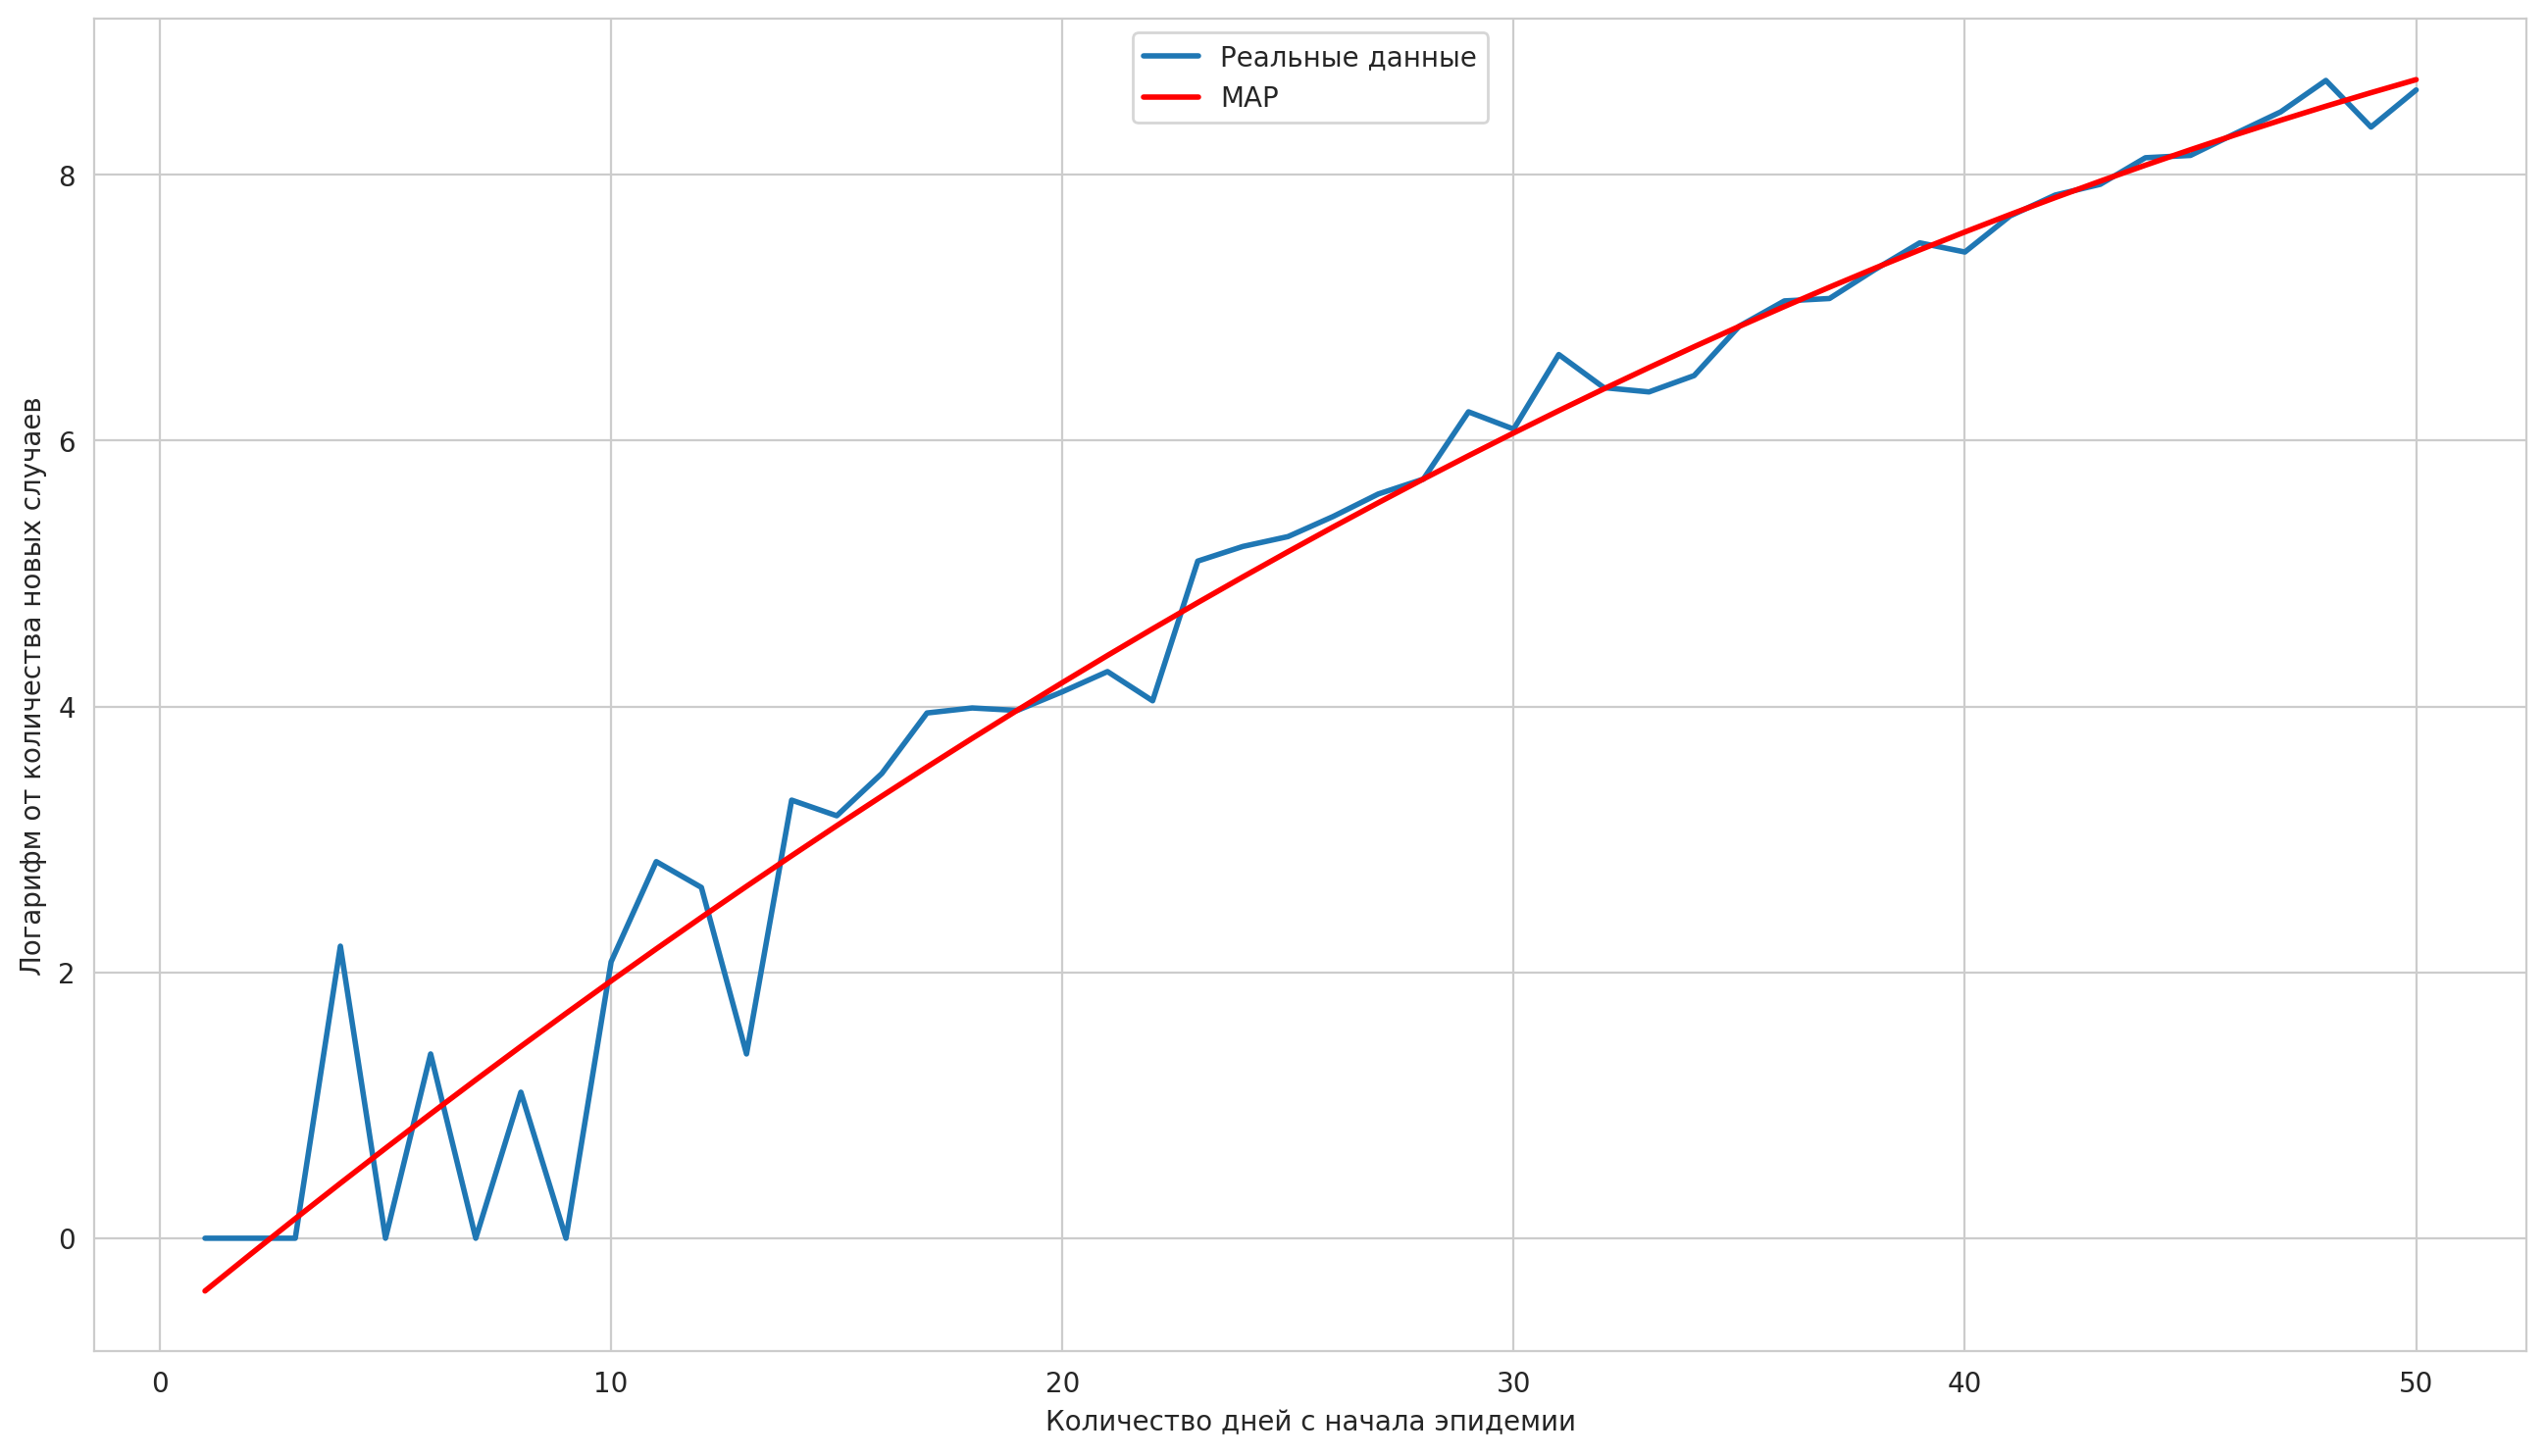

In [20]:
fig = plt.figure(figsize=(16, 9), dpi=200)

ax = fig.add_subplot(111)
ax.plot(X, np.log(y), linewidth=2, label="Реальные данные")
ax.plot(X, F(X) @ w, linewidth=2, color="r", label="MAP")

ax.set_xlabel("Количество дней с начала эпидемии")
ax.set_ylabel("Логарифм от количества новых случаев")
ax.legend(loc="upper center")

plt.show()

#### Параметры апостериорного распределения

In [21]:
var_noise = np.var(np.log(y) - F(X) @ w)
print("Дисперсия шума:", var_noise)

alpha = 10 ** 6
m_init = np.zeros((w.shape[0], 1))
S_init = np.eye(w.shape[0]) * alpha

m_post, S_post = get_posterior_parameters(m_init, S_init, var_noise, F, X, y)
print("MAP:\t\t", w.T)
print("Posterior:\t", m_post.T)

Дисперсия шума: 0.23928684127005562
MAP:		 [[-0.67404303  0.27928241 -0.00182979]]
Posterior:	 [[-0.67404299  0.27928241 -0.00182979]]


#### Семплирование из апостериорного распределения

In [38]:
# Спрогнозируем общее количество случаев на конец 2020 года
date = "2020-12-31"
n_samples = 50

n_days = get_day_number(FIRST_DAY, date)
x_pred = np.arange(n_days) + 1
Y_pred = get_predictive_empiric(m_post, S_post, F, x_pred, n_samples=n_samples)
Y_pred_total = np.cumsum(np.exp(Y_pred), axis=1)

ValueError: x and y must have same first dimension, but have shapes (50, 1) and (13,)

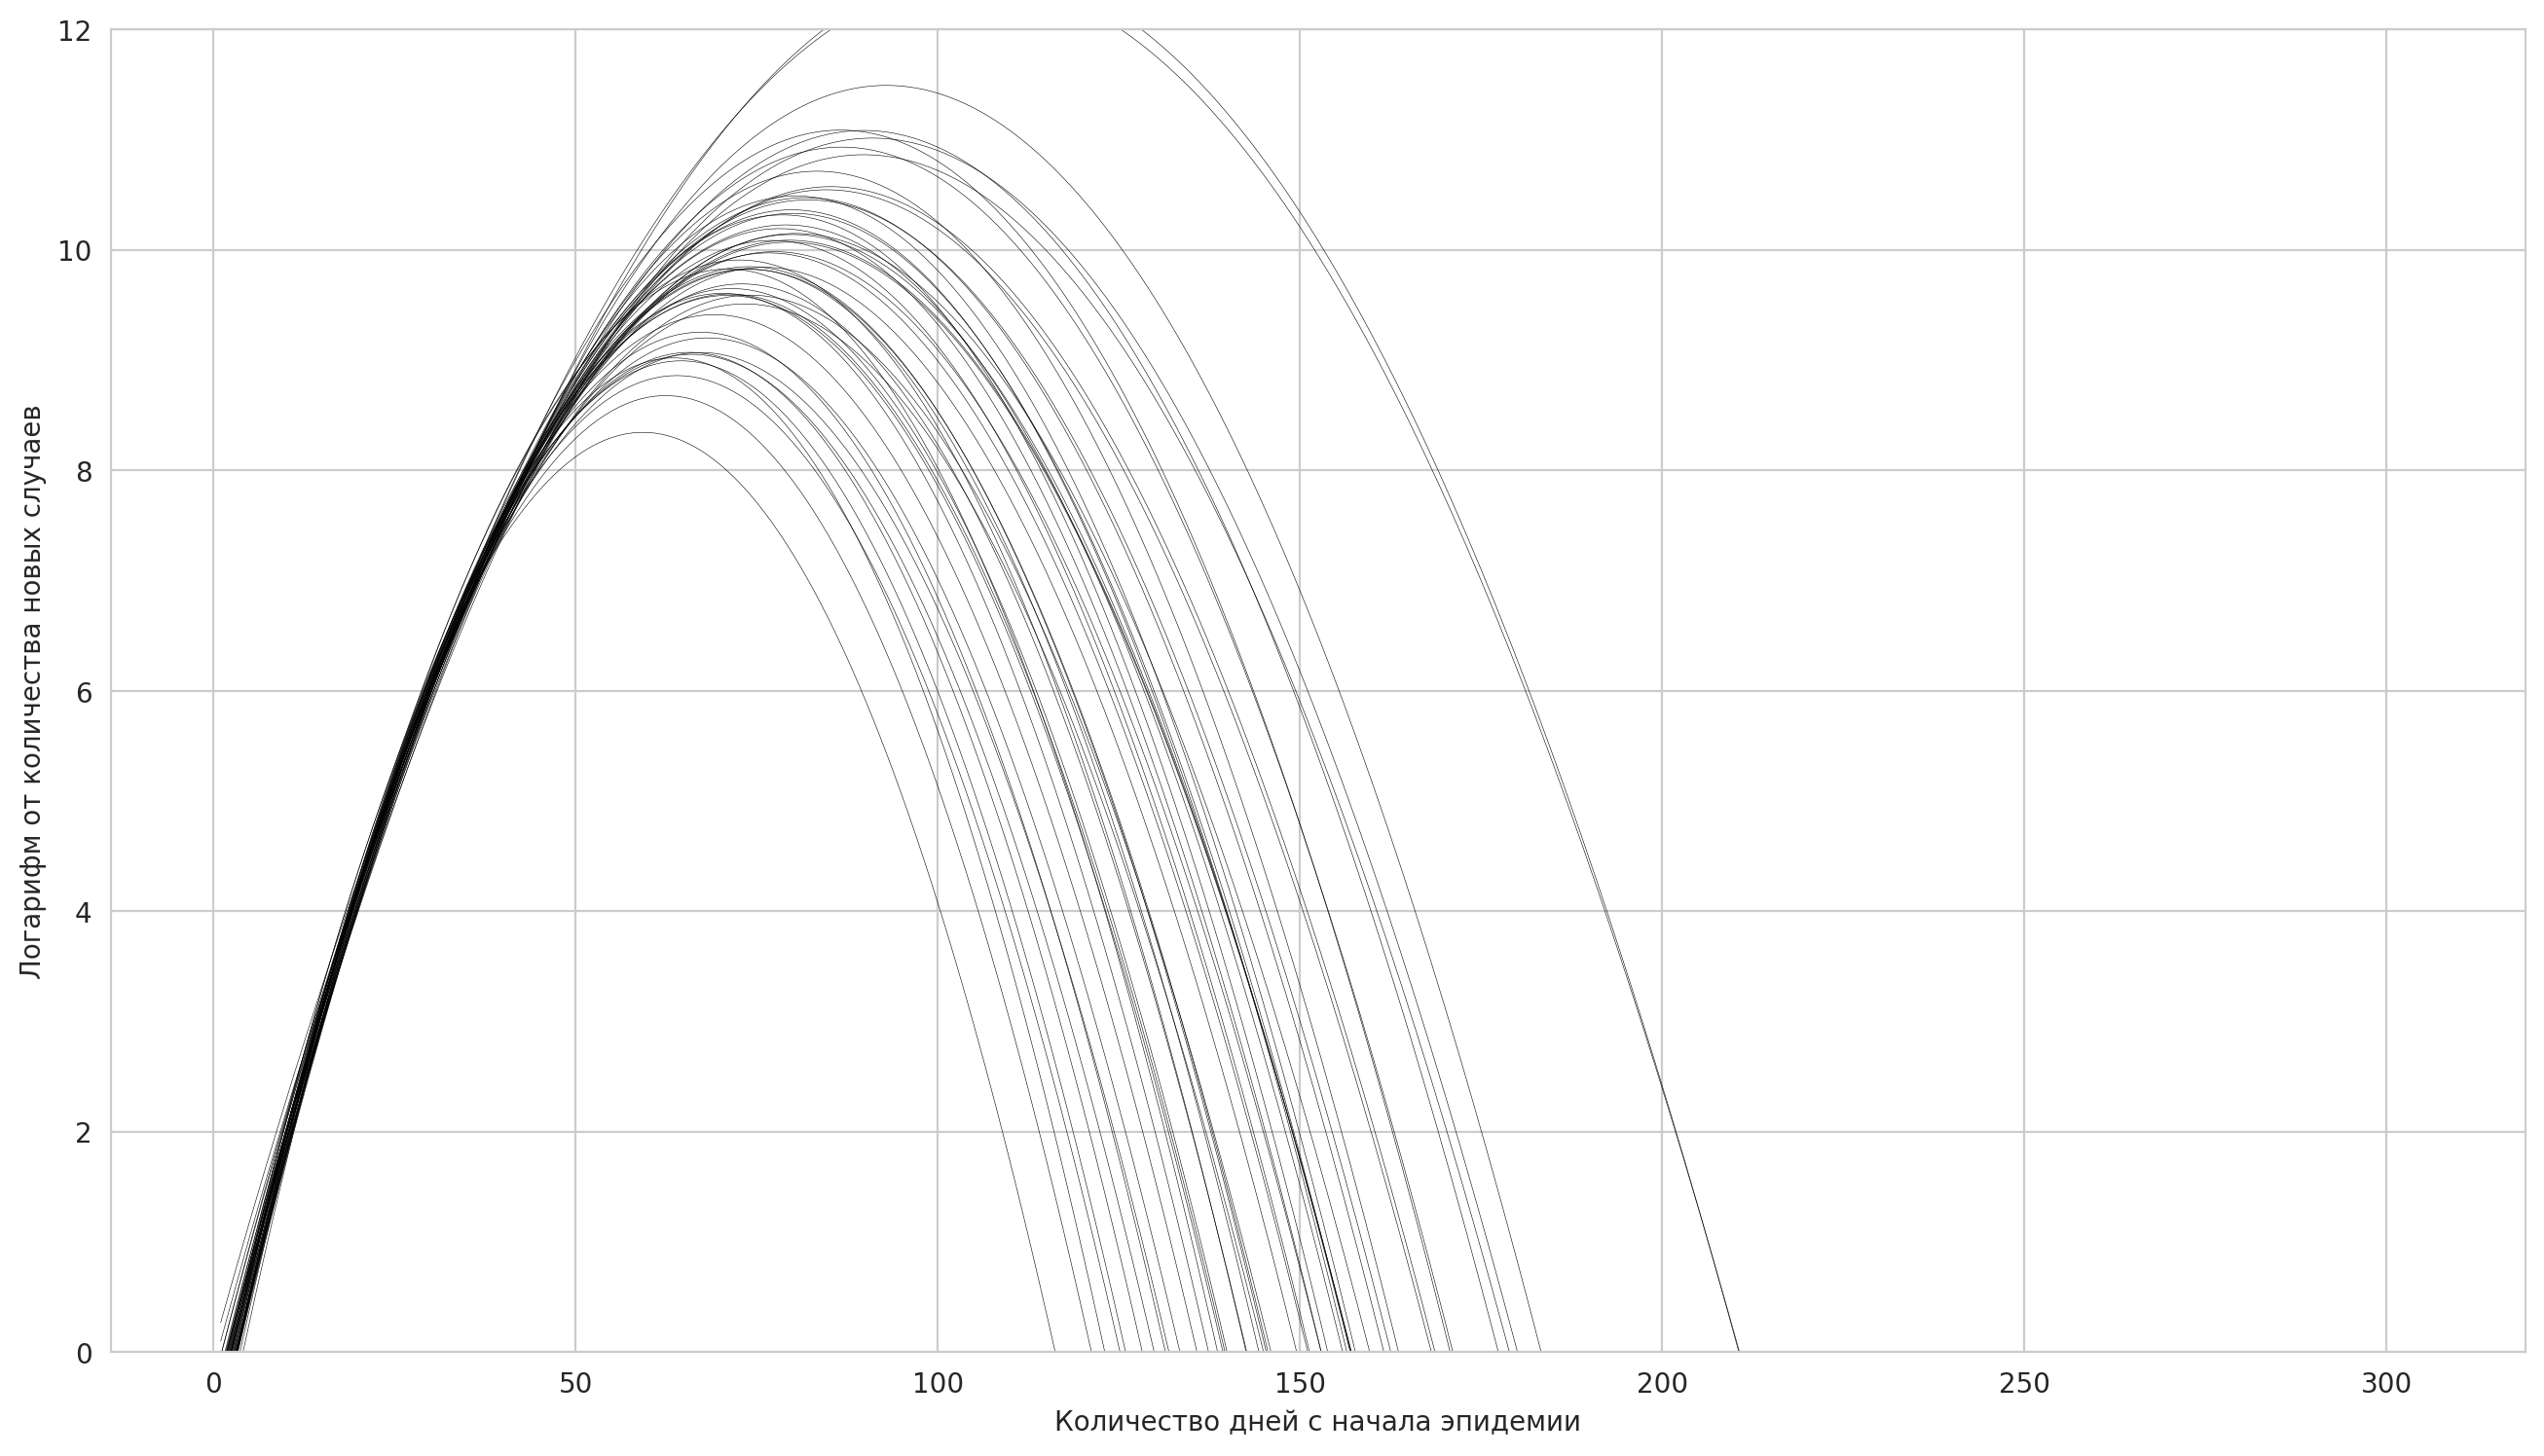

In [39]:
fig = plt.figure(figsize=(16, 9), dpi=200)
ax = fig.add_subplot(111)
ax.set_xlabel("Количество дней с начала эпидемии")
ax.set_ylabel("Логарифм от количества новых случаев")
ax.set_ylim((0, 12))

for y_pred in Y_pred:
    ax.plot(x_pred, y_pred, linewidth=0.2, color="black")
ax.plot(X, np.log(y), linewidth=2, color="blue")
ax.plot(x_pred, F(x_pred) @ w, linewidth=2, color="r", label="MAP")

plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=200)
ax = fig.add_subplot(111)

for y_pred in np.cumsum(np.exp(Y_pred), axis=1):
    ax.plot(x_pred, y_pred, linewidth=0.5, color="black")
ax.plot(x_pred, np.cumsum(np.exp(F(x_pred) @ w), axis=0), linewidth=2, color="r", label="MAP")
ax.plot(X, y_total, linewidth=2, color="blue")

ax.set_xlabel("Количество дней с начала эпидемии")
ax.set_ylabel("Общее количество случаев")
ax.set_ylim((0, 2 * 10 ** 6))
plt.show()

In [25]:
n_samples = 10 ** 6

Y_pred = get_predictive_empiric(m_post, S_post, F, x_pred, n_samples=n_samples)
y_pred = np.sum(np.exp(Y_pred), axis=1)

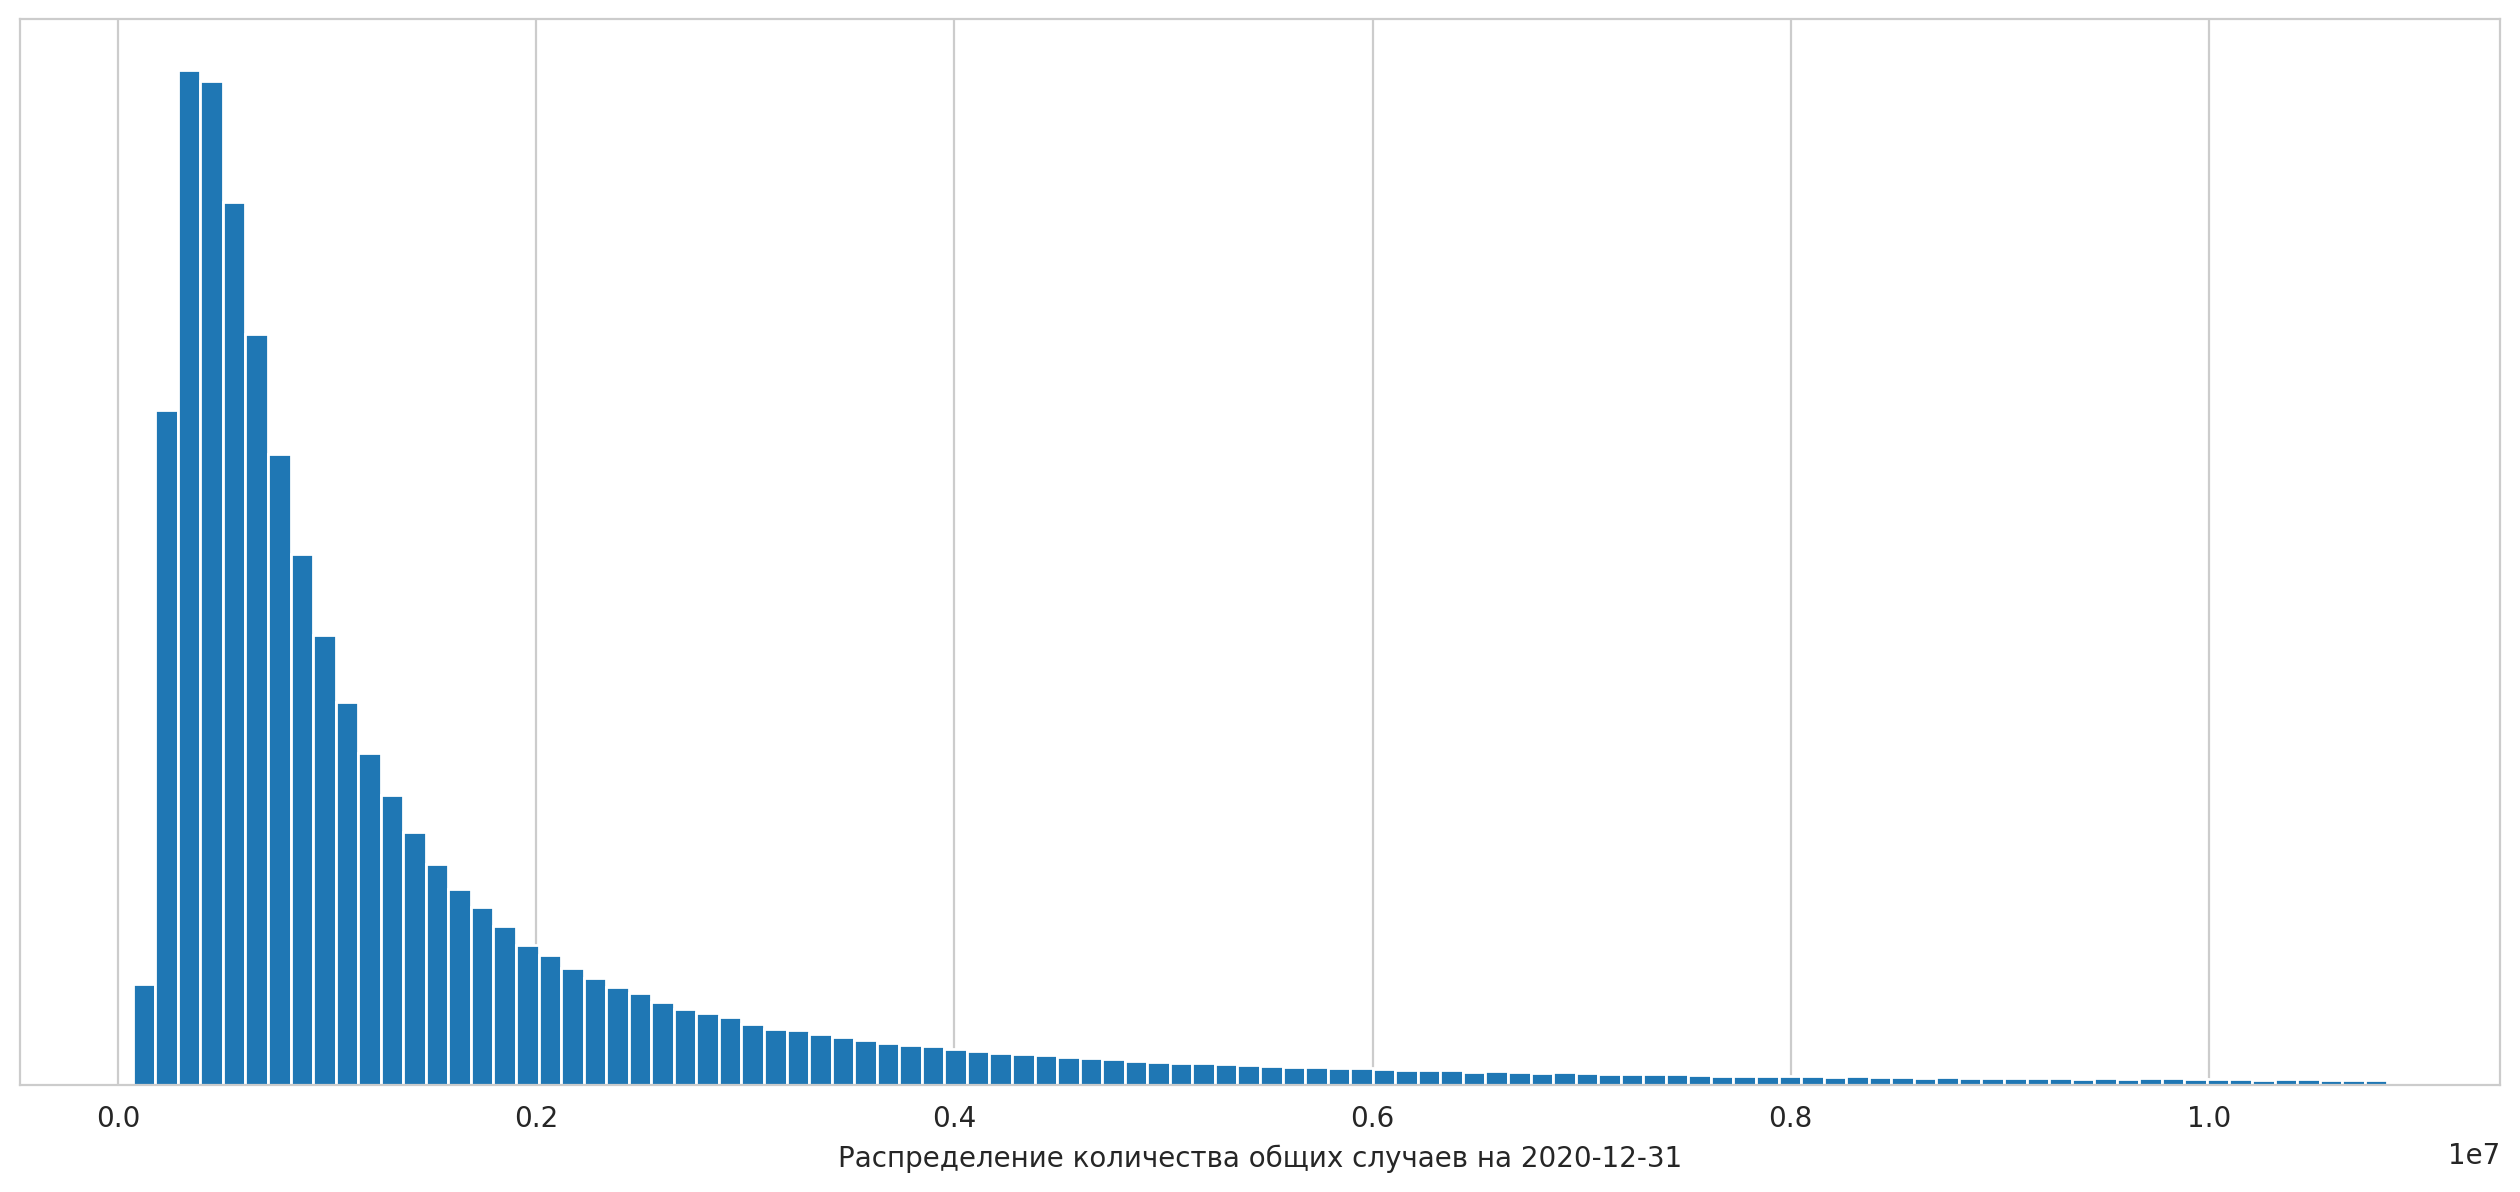

In [26]:
outliers_threshold = 95

fig = plt.figure(figsize=(16, 24), dpi=200)
ax = fig.add_subplot(3, 1, i + 1)
ax.hist(y_pred[y_pred < np.percentile(y_pred, outliers_threshold)], bins=100)
ax.get_yaxis().set_visible(False)
ax.set_xlabel(f"Распределение количества общих случаев на {date}")
plt.show()

In [27]:
percentiles = [10, 50, 75, 90, 95, 99]
for p in percentiles:
    x = np.percentile(y_pred, p)
    print(f"{p}-й процентиль: {x / 10 ** 6:.2f} млн ({x * 100 / POPULATION:.2f}% от всего населения)")

10-й процентиль: 0.32 млн (0.22% от всего населения)
50-й процентиль: 0.90 млн (0.62% от всего населения)
75-й процентиль: 1.99 млн (1.36% от всего населения)
90-й процентиль: 5.19 млн (3.56% от всего населения)
95-й процентиль: 10.85 млн (7.44% от всего населения)
99-й процентиль: 75.25 млн (51.57% от всего населения)


### Сигмоидальная модель в зависимости от дисперсии шума

- прогноз на конец 2020 года
- дисперсия шума в диапазоне от 0.1 до 1
- будем смотреть на количество случаев в процентах от всей популяции (90-ый процентиль)

In [28]:
def get_train_data(first_day, last_day, n_train_days, country):
    df_rus = get_dataset(first_day, n_days=n_train_days, country=country)
    F = partial(basis_functions, degree=2)
    X = df_rus.day.to_numpy().reshape(-1, 1)
    y = df_rus["new_cases"].to_numpy().reshape(-1, 1)
    x_pred = np.arange(get_day_number(first_day, last_day)) + 1
    return F, X, y, x_pred


def compute_noise_variance(F, X, y):
    model = linear_model.LinearRegression()
    model.fit(F(X), np.log(y))
    w = get_weights(model)
    return np.var(np.log(y) - F(X) @ w)


def compute_percentile(first_day="2020-01-01", last_day="2020-12-31", n_train_days=50, country="Russia",
                       var_noise=0.25, alpha=10 ** 6, n_samples=10, percentile=90):
    F, X, y, x_pred = get_train_data(first_day, last_day, n_train_days, country)
    if var_noise == 0:
        var_noise = compute_noise_variance(F, X, y)
    m_init = np.zeros((F(X).shape[1], 1))
    S_init = np.eye(F(X).shape[1]) * alpha
    m_post, S_post = get_posterior_parameters(m_init, S_init, var_noise, F, X, y)
    Y_pred = get_predictive_empiric(m_post, S_post, F, x_pred, n_samples=n_samples)
    y_pred = np.sum(np.exp(Y_pred), axis=1)
    return np.percentile(y_pred, percentile)


def plot_percentage_bar(x, y, xlabel=""):
    fig = plt.figure(figsize=(16, 8), dpi=200)
    ax = fig.add_subplot(111)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Количество заболевших в процентах от всего населения")
    ax.set_xticks(x)
    ax.bar(x, y, color="blue", width=(x[1] - x[0]) * 0.8)
    plt.show()

In [29]:
last_day = "2020-12-31"
n_samples = 10 ** 5
variances = np.arange(0.1, 1.1, 0.1)

p_func = partial(compute_percentile, first_day=FIRST_DAY, last_day=last_day, n_samples=n_samples)
v_func = np.vectorize(p_func)
percentiles = v_func(var_noise=variances)
percentage = np.minimum(percentiles / POPULATION, 1) * 100

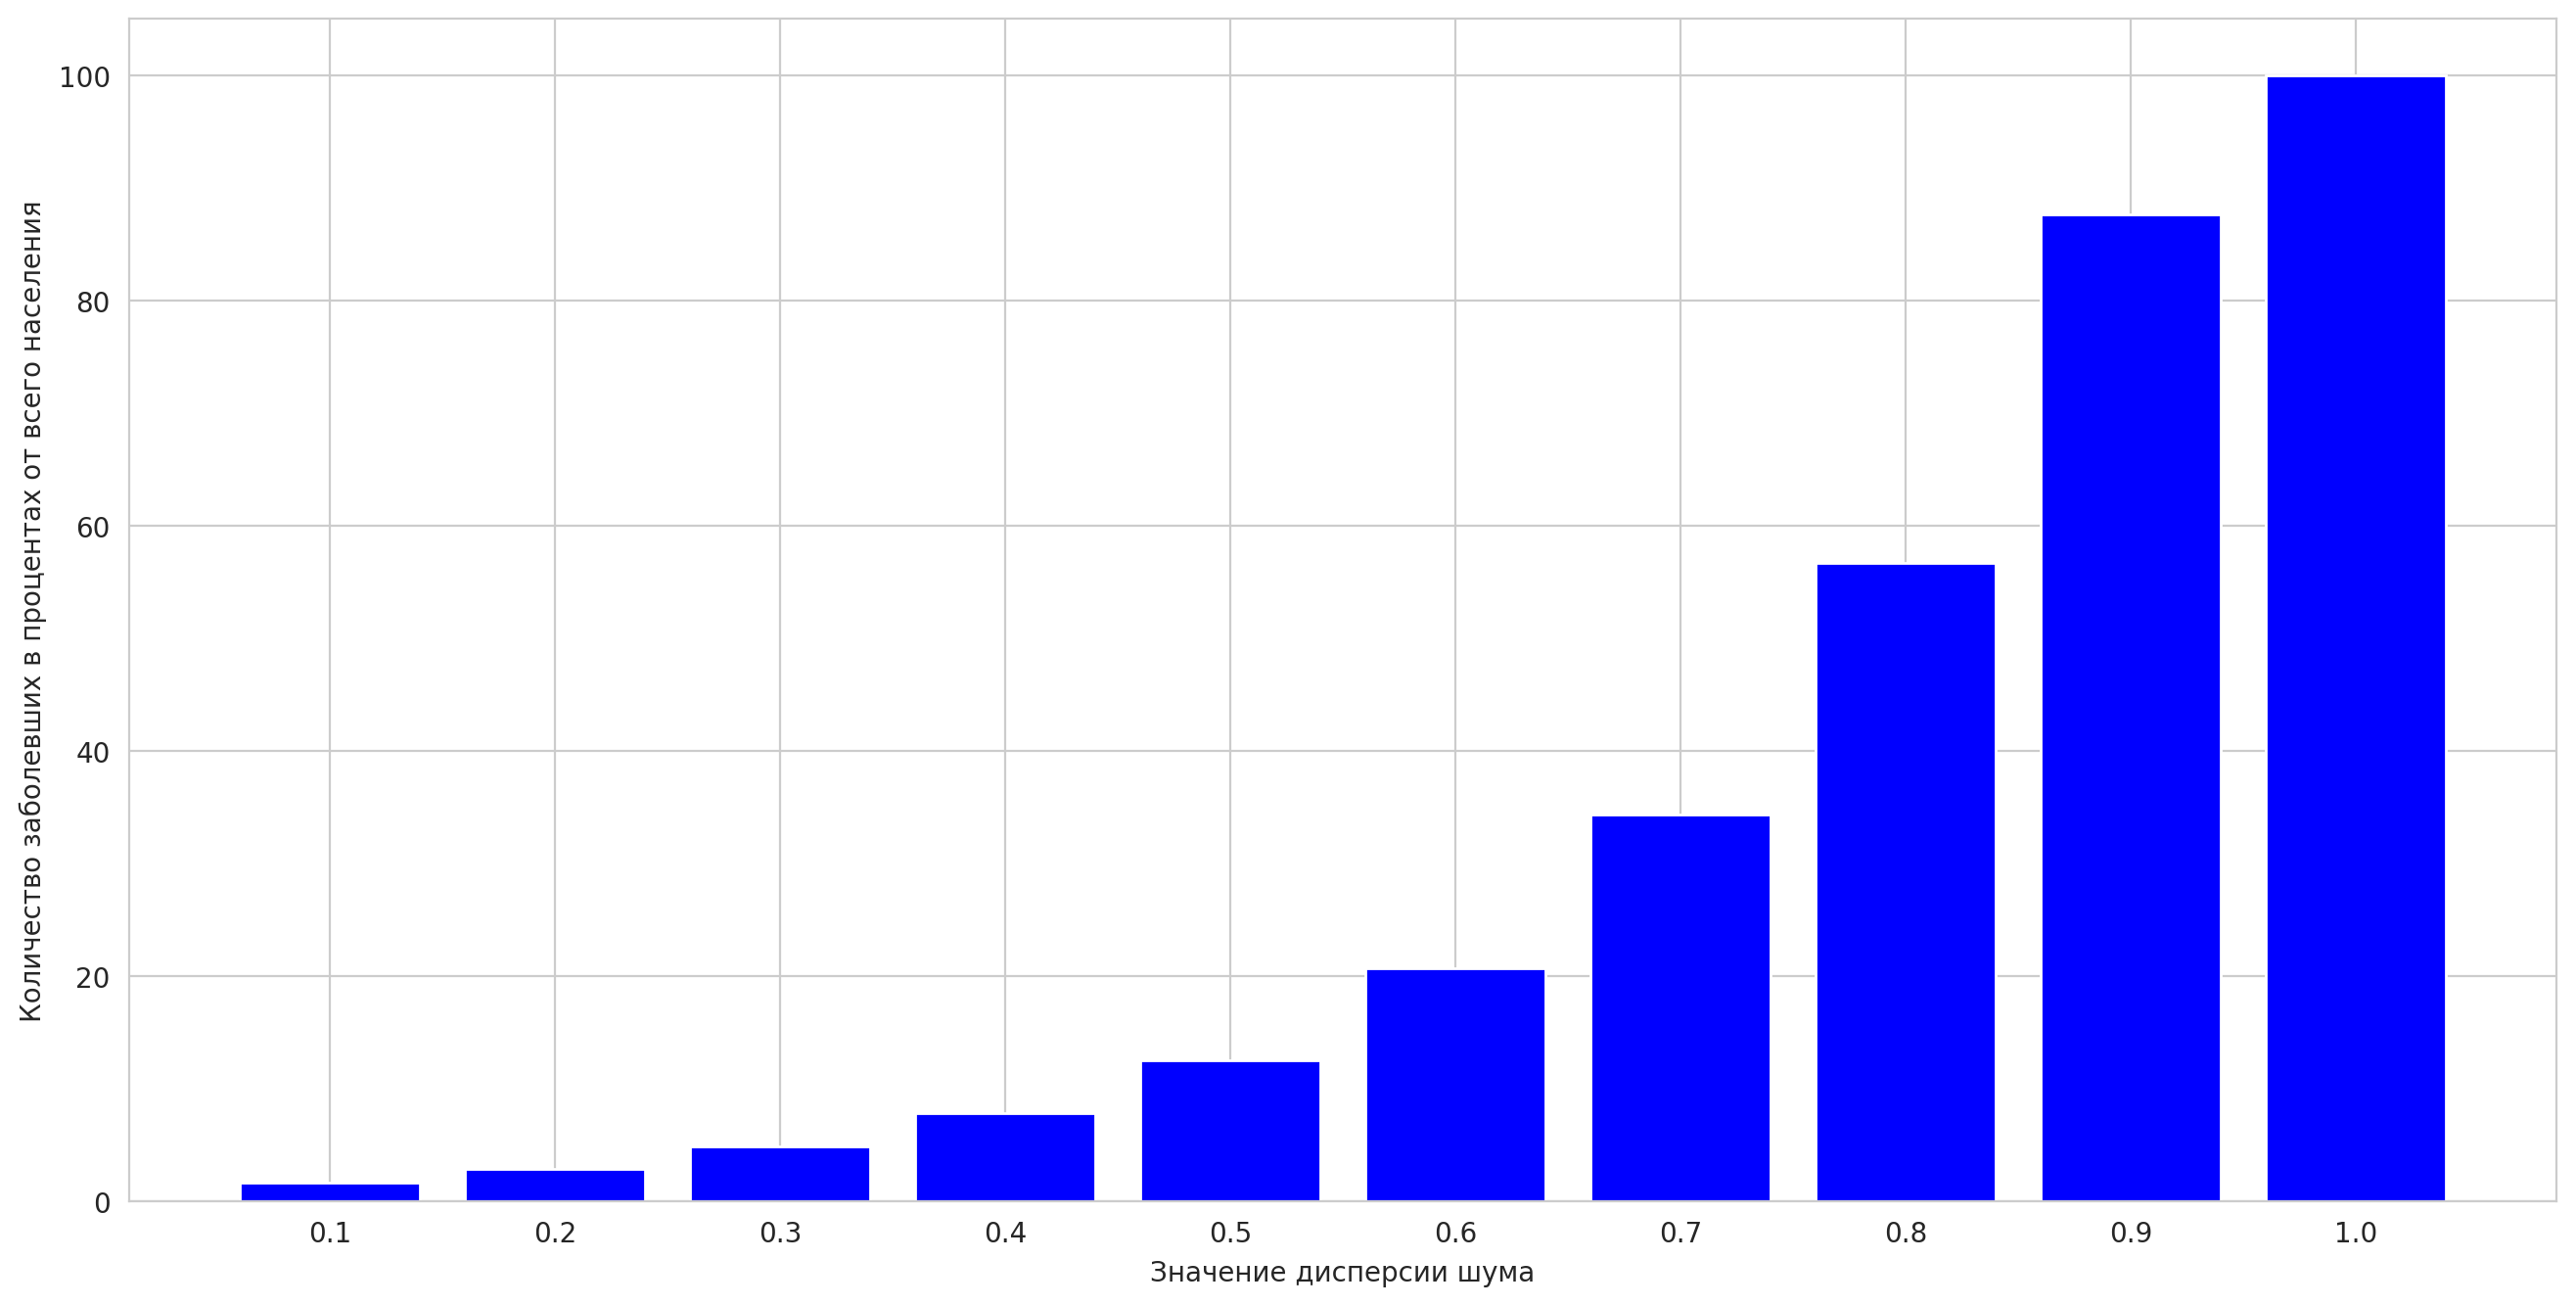

In [30]:
plot_percentage_bar(variances, percentage, xlabel="Значение дисперсии шума")

При дисперсии шума 0.6 90-й процентиль прогнозирует заражение пятой части населения России

### Сигмоидальная модель в зависимости от количества дней в тренировочной выборке

- прогноз на конец 2020 года
- дисперсия шума 0.25 и 0.5
- количество дней в тренировной выборке от 45 до 55 
- будем смотреть на количество случаев в процентах от всей популяции (90-ый процентиль)

#### Дисперсия шума 0.25

In [31]:
last_day = "2020-12-31"
n_samples = 10 ** 5
var_noise = 0.25
n_train_days_collection = np.arange(45, 56)

p_func = partial(compute_percentile, 
                 first_day=FIRST_DAY,
                 last_day=last_day, 
                 n_samples=n_samples, 
                 var_noise=var_noise
                )
v_func = np.vectorize(p_func)
percentiles = v_func(n_train_days=n_train_days_collection)
percentage = np.minimum(percentiles / POPULATION, 1) * 100

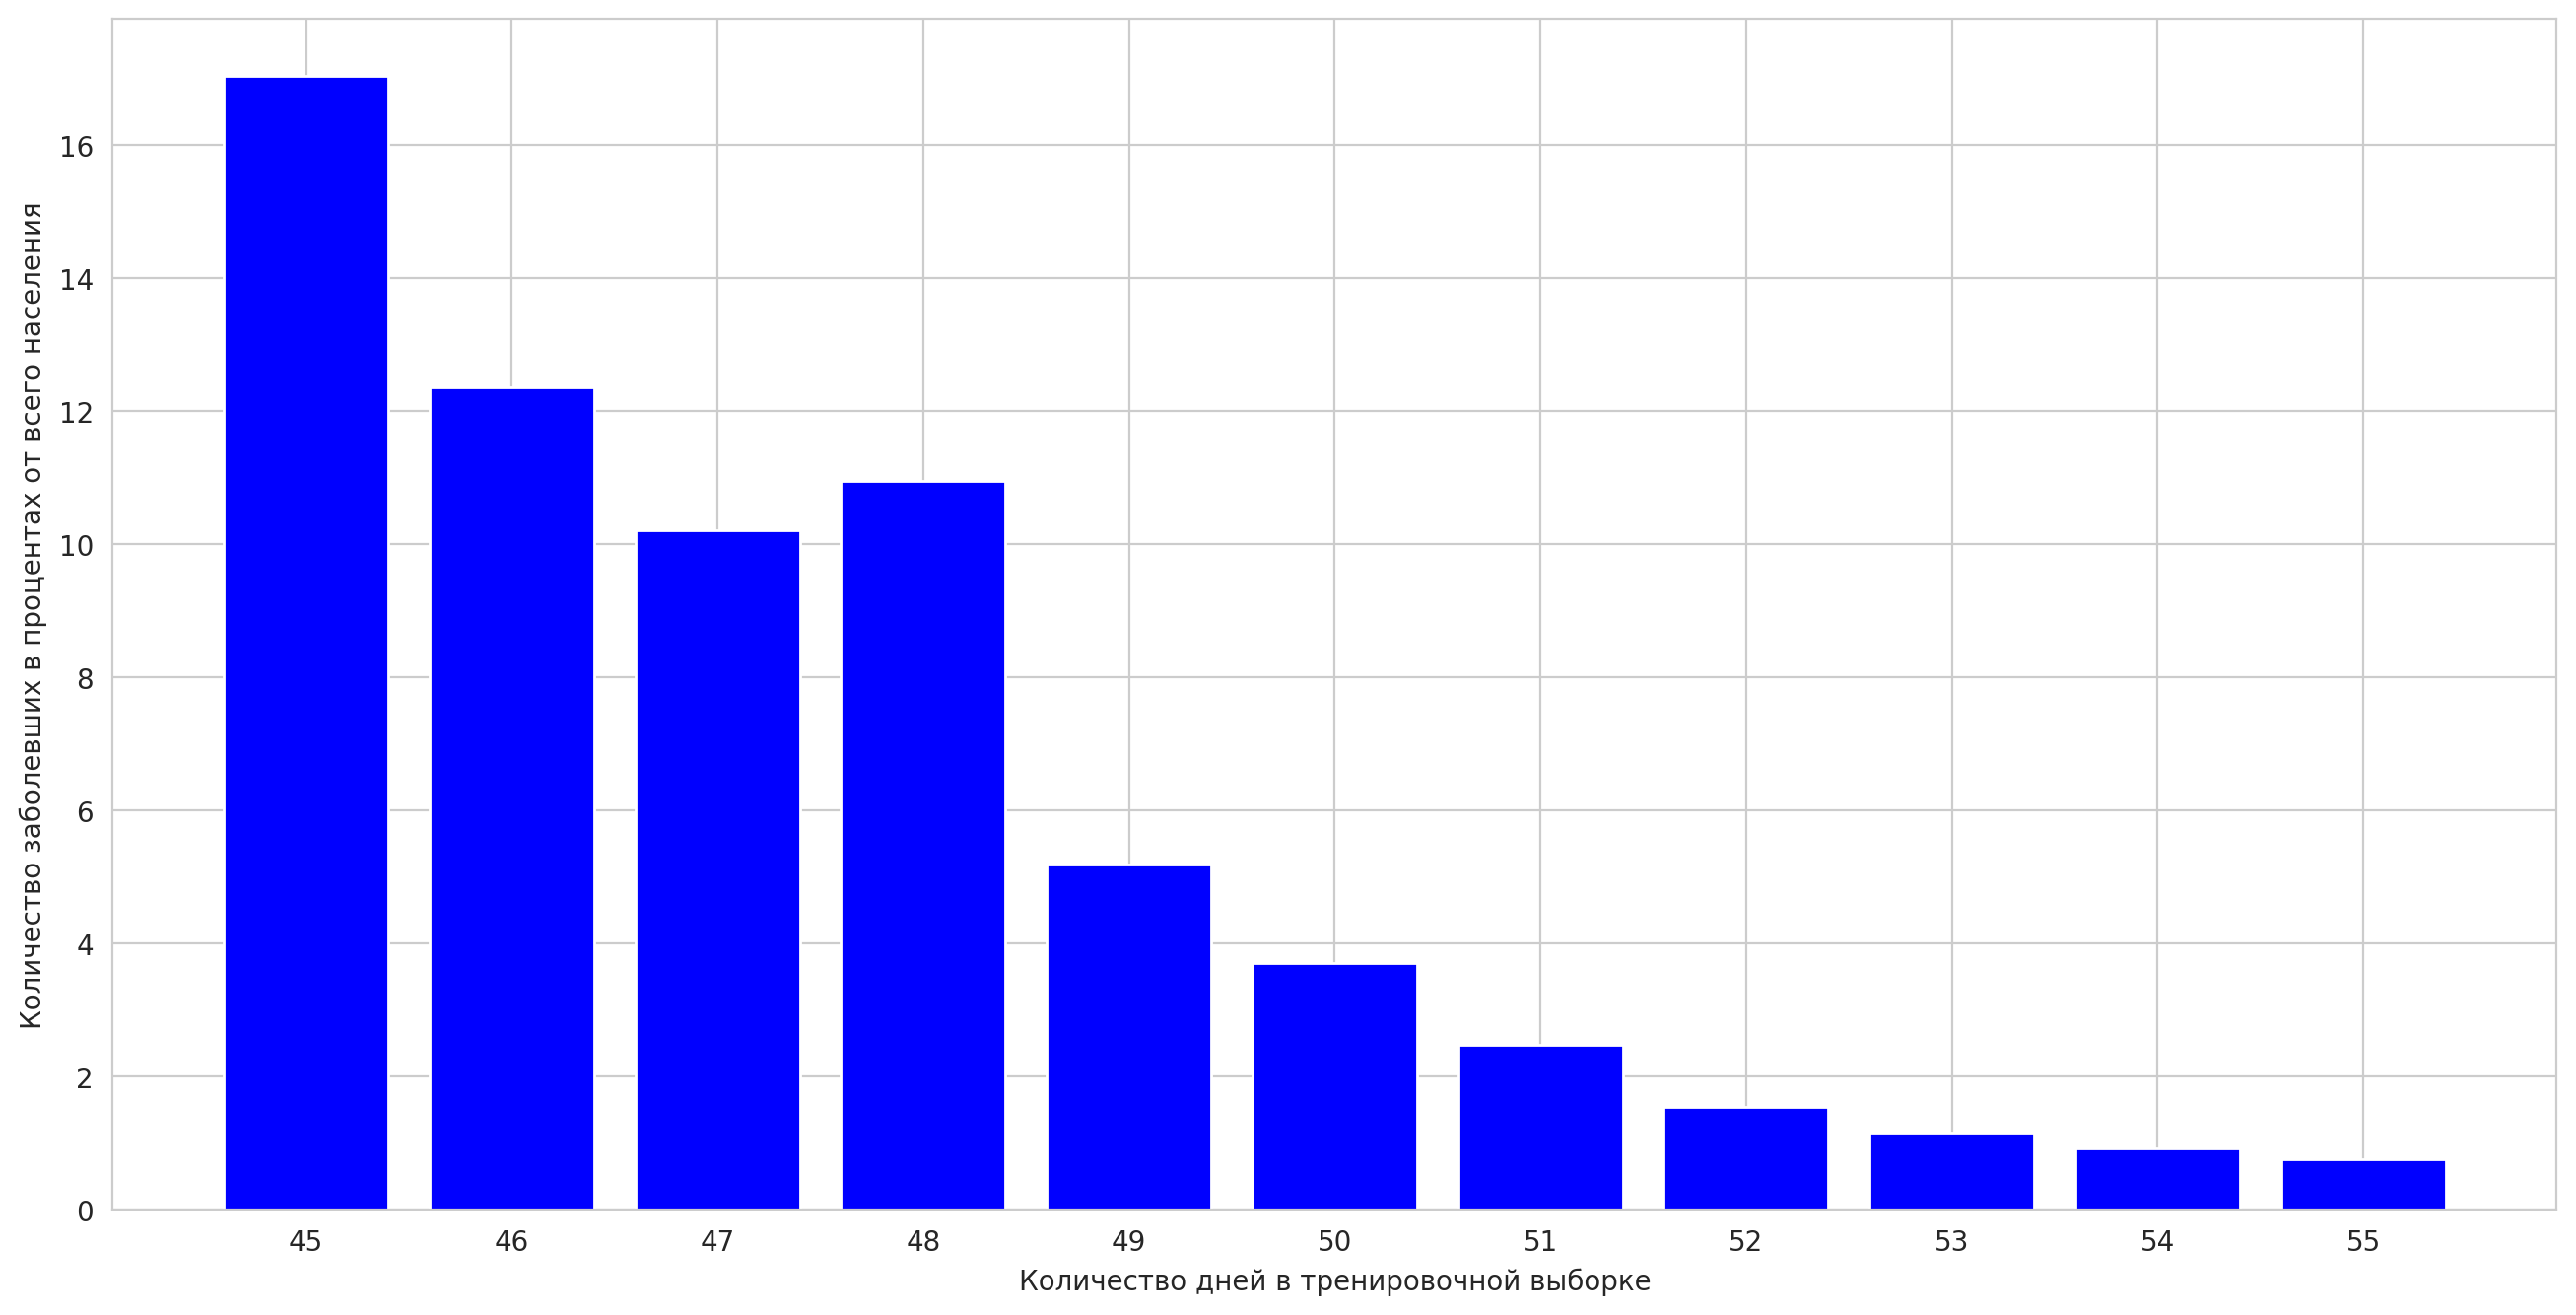

In [32]:
plot_percentage_bar(n_train_days_collection, percentage, xlabel="Количество дней в тренировочной выборке")

#### Дисперсия шума 0.5

In [33]:
last_day = "2020-12-31"
n_samples = 10 ** 5
var_noise = 0.5
n_train_days_collection = np.arange(45, 56)

p_func = partial(compute_percentile, 
                 first_day=FIRST_DAY,
                 last_day=last_day, 
                 n_samples=n_samples, 
                 var_noise=var_noise
                )
v_func = np.vectorize(p_func)
percentiles = v_func(n_train_days=n_train_days_collection)
percentage = np.minimum(percentiles / POPULATION, 1) * 100

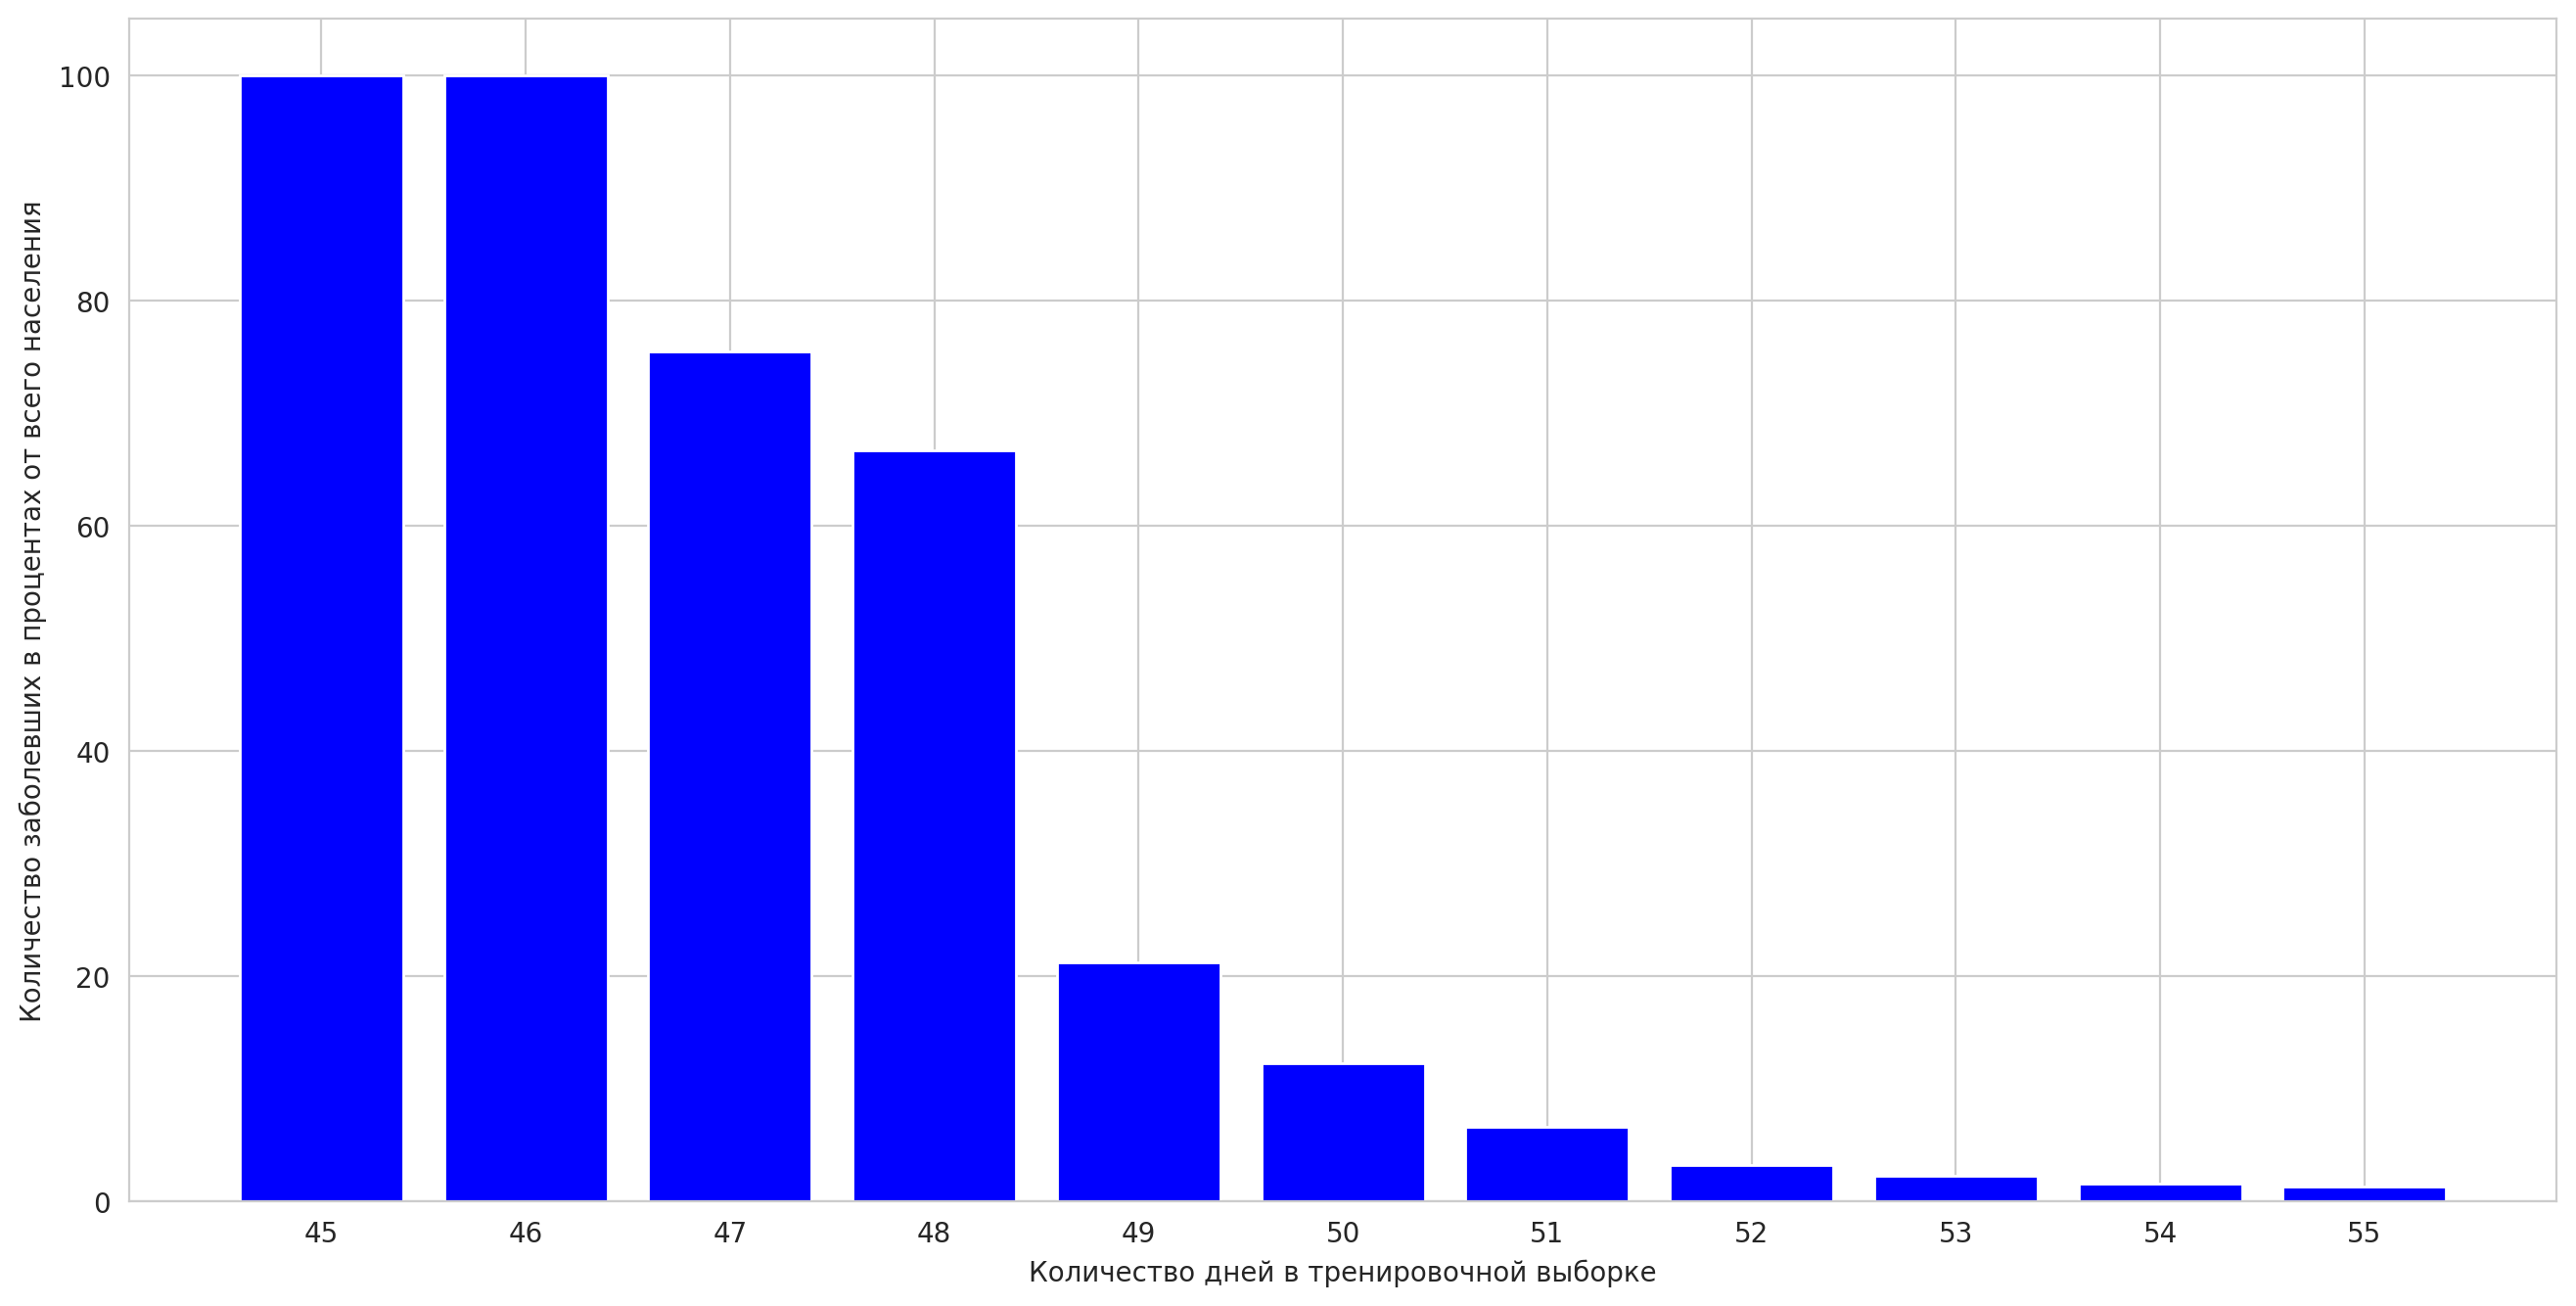

In [34]:
plot_percentage_bar(n_train_days_collection, percentage, xlabel="Количество дней в тренировочной выборке")

Предсказания модели (90-й процентиль) в разы отличаются даже на небольшом промежутке (48-52 дни)

### Прогнозирование по данным других стран

- прогноз на конец 2020 года
- дисперсия шума на основе MAP
- количество дней в тренировной выборке 52
- будем смотреть на количество случаев в процентах от всей популяции (90-ый процентиль)

In [35]:
countries_collection = [
    ("Russia", "2020-03-05", 145934462),
    
    ("Italy", "2020-02-21", 60461826),
    ("Spain", "2020-02-24", 46754778),
    ("France", "2020-02-25", 65273511),
    
    ("United States", "2020-02-28", 331002651),
    ("Canada", "2020-02-27", 37742154),
    
    ("Germany", "2020-02-25", 83783942),
    ("Czechia", "2020-03-01", 10708981),
    ("Norway", "2020-02-27", 5421241),
    ("Finland", "2020-02-27", 5540720),
    
    ("Netherlands", "2020-02-28", 17134872),
    ("Sweden", "2020-02-27", 10099265),
    
    ("South Korea", "2020-01-30", 51269185),
]

In [36]:
n_samples = 10 ** 5
last_day="2020-12-31"
n_train_days = 52
percentile = 90

p_func = partial(compute_percentile, 
                 last_day=last_day, 
                 n_train_days=n_train_days, 
                 var_noise=0, 
                 n_samples=n_samples,
                 percentile=percentile)
ps = []
for country, first_day, population in countries_collection:
    ps.append(p_func(first_day=first_day, country=country) * 100 / population)

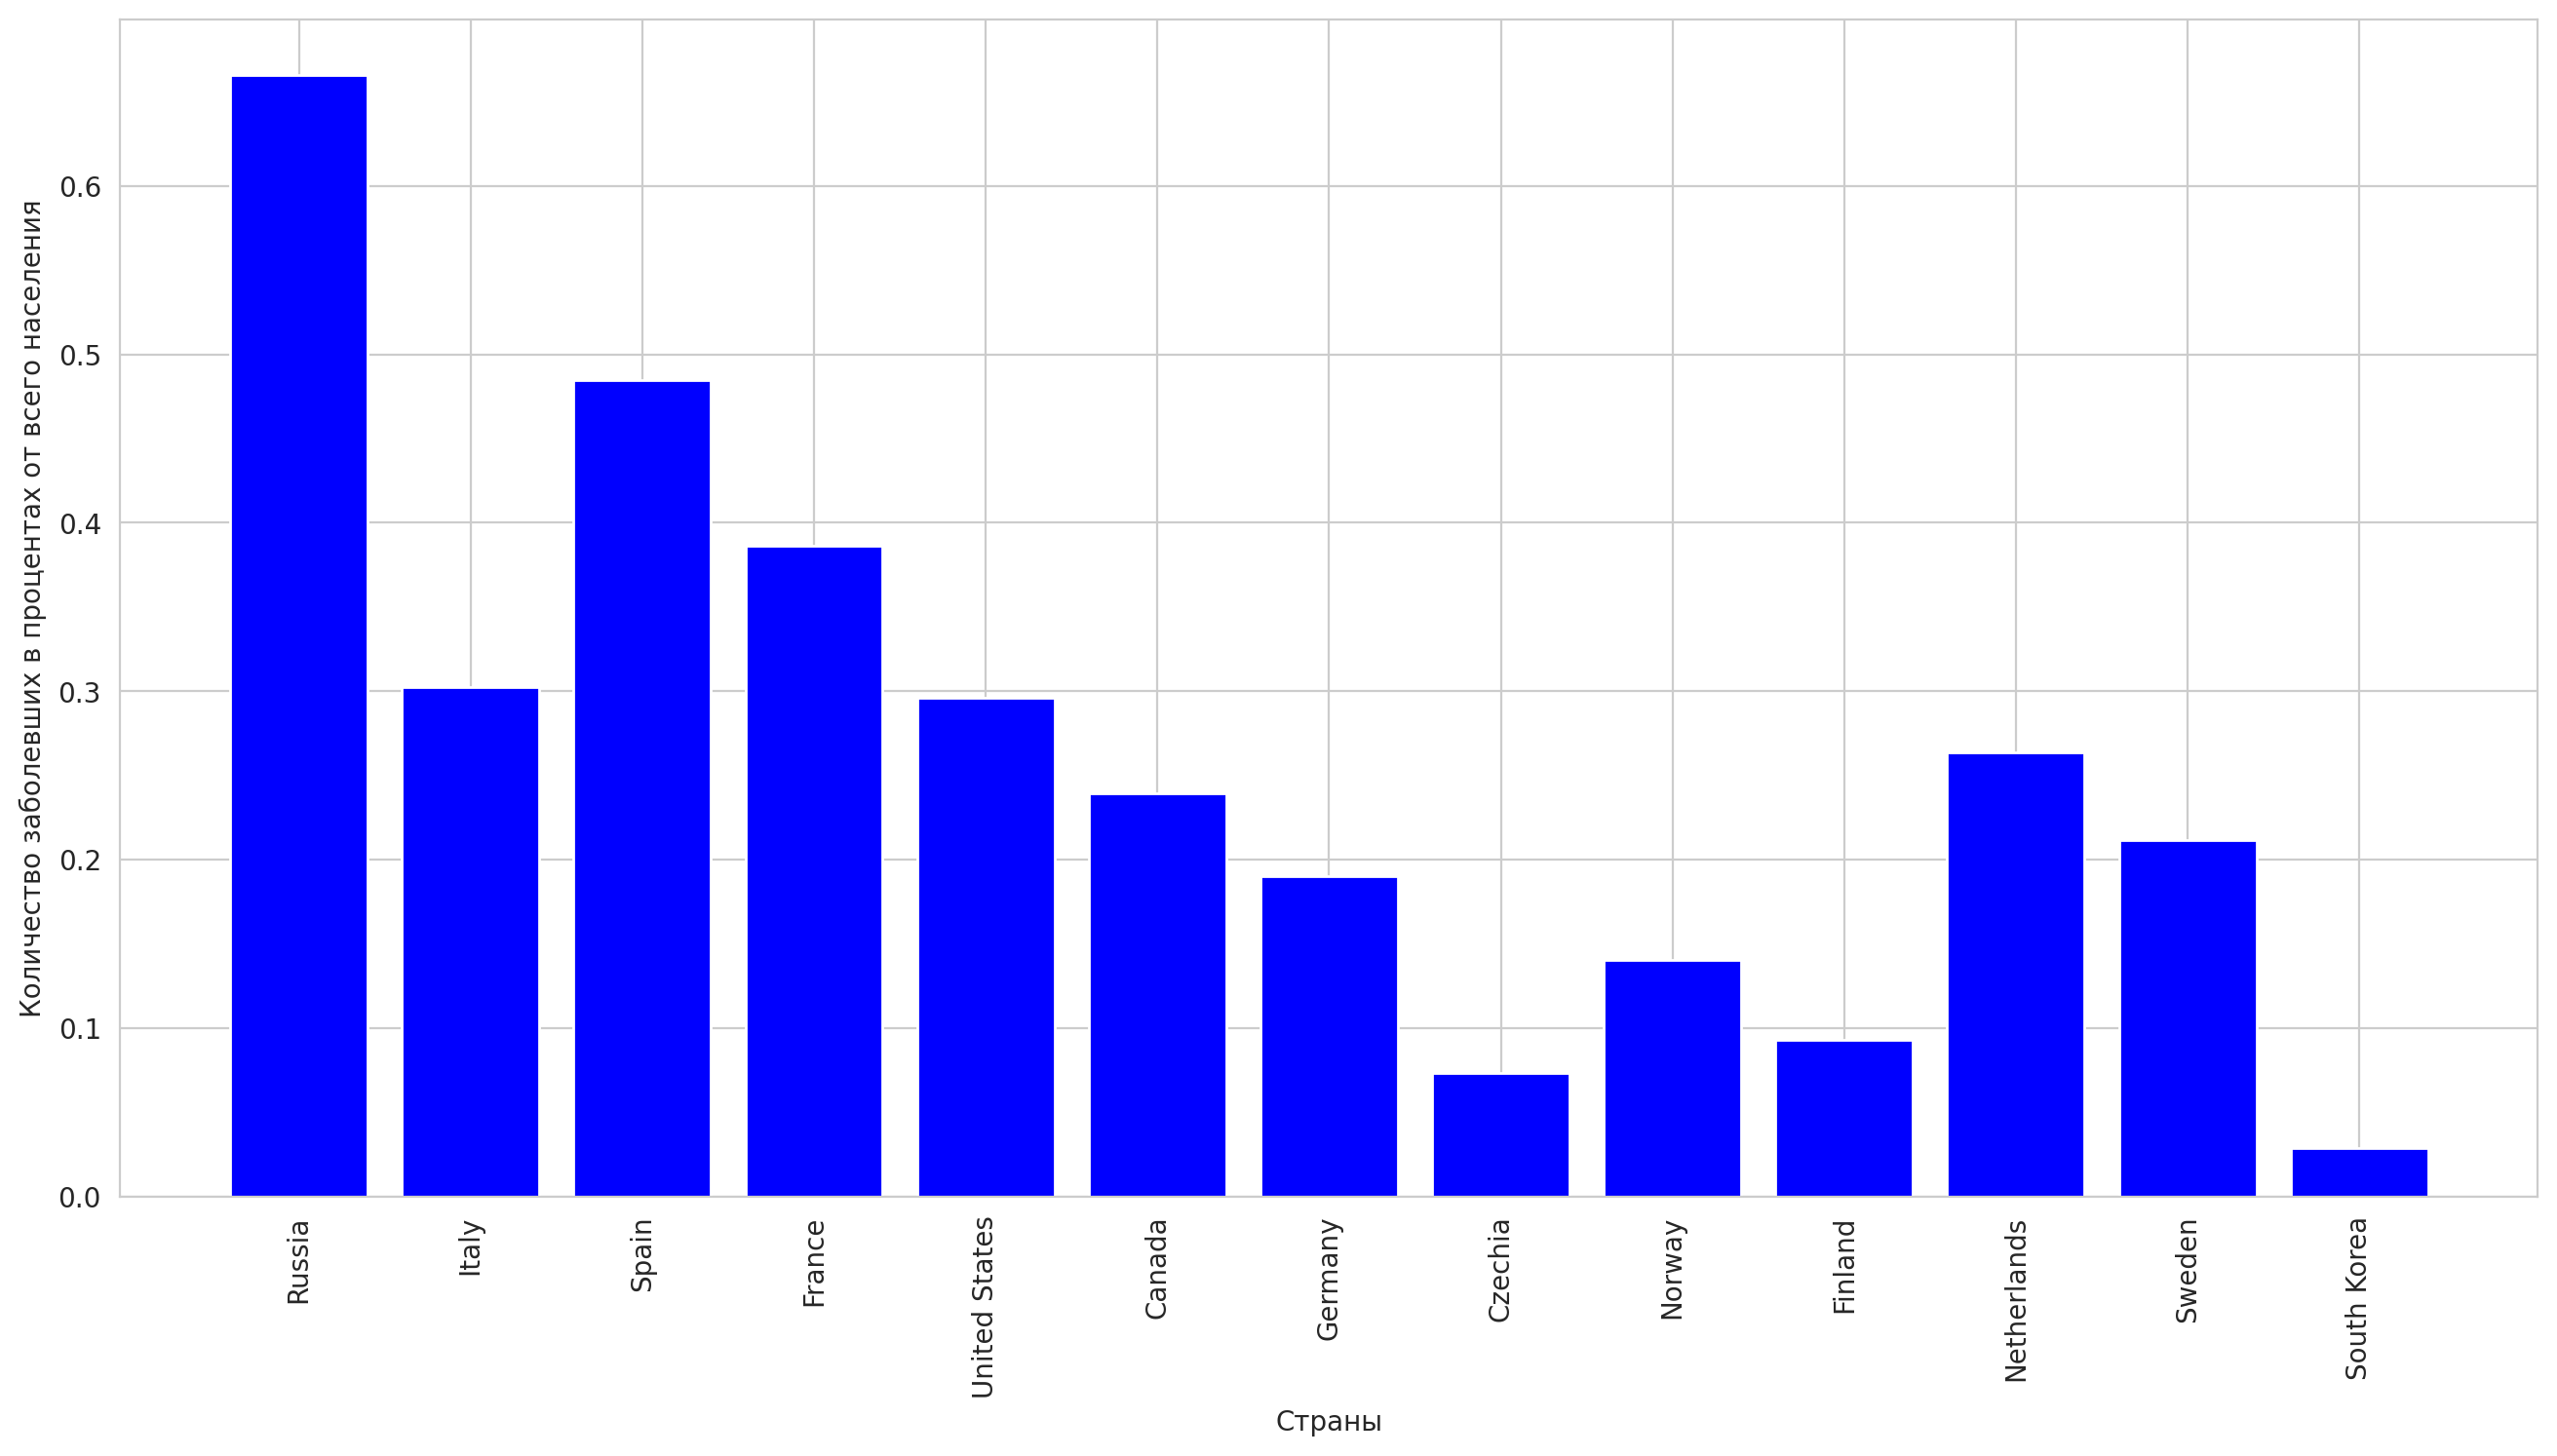

In [37]:
countries = [c for c, _, _ in countries_collection]
x = np.arange(len(countries))
y = ps
fig = plt.figure(figsize=(16, 8), dpi=200)
ax = fig.add_subplot(111)
ax.set_xlabel("Страны")
ax.set_ylabel("Количество заболевших в процентах от всего населения")
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=90)
ax.bar(x, y, color="blue", width=(x[1] - x[0]) * 0.8)
plt.show()

В кластер можно выделить азиатские страны, для которых модель не может спрогнозировать что-то внятное (например, Япония и Тайвань). Рост заболеваемости там слишком низкий, чтобы описывать его экспоненциальной зависимостью. На их фоне несколько выделяется Южная Корея где, по-видимому, всплеск был обусловлен деятельностью религиозной секты. И даже в таком случае это ниже показателей других стран на графике. В туристических странах (Италия, Испания, Франция) прогноз заболеваемости выше, чем, например, в скандинавских (Норвегия, Финляндия). Швеция (вместе с Нидерландами) пошла по пути достижения группового иммунитета. Лидерство России, видимо, связано с запоздалыми в сравнении с остальными странами мерами по введению карантина. На выборке из 55-60 дней, это уже не так заметно.

По итогам моделирования сложилось впечатление о бесполезности прогнозирования для принятия решений о введении карантина. Прогноз модели сильно варьируется, например, от количества дней в тренировочной выборке, где на 45 днях может прогнозироваться заражение всей страны, а на 55 - заражение менее одного процента населения. Кроме того, пока эти данные будут собираться, болезнь успеет распространиться. Также на прогноз сильно влияет значение дисперсии шума в данных, которое мы выбираем, опираясь на максимальную апостериорную модель. 